<a href="https://colab.research.google.com/github/Prem-2407/Ted-Talks/blob/main/Prem_Ted_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:  Ted Talks Views Prediction

---



TED is decoted to spereading powerful ideas on just about any topic . These datasets contain over 4,000 talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts fromm the fileds of Technology ,Entertainmnet and Design together ..

TED conferences have gone on to becomme theMecca of ideas from virtually all walks of life .As of 2015 ,TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses  and its speaker list boasts of the likes of AI Gore, Jimmy Wales,ShahRukh Khan,Bll Gates.


Our main objective id to build a predictive model to predict the number of views for the respective videos from the TEDx website.As we have a continous varible to predict ,we use regression models to predict the views of the TED talks .

#**Steps to follow** 

**1) Data Loading**

**2)Data Cleaning**

**3)EDA**

**4) Feature engineering**

**5) Model building**

In [ ]:
  # Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#**Mounting The Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading the Data set**

In [ ]:
tedtalk_df=pd.read_csv('//content/drive/MyDrive/Alma Better Ted Talks/data_ted_talks.csv')

In [ ]:
tedtalk_df.head(3)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   
2        7                 Simplicity sells   David Pogue   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2   {0: 'David Pogue'}                  {0: ['technology columnist']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...

In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

**Shape of the Dataset**

In [ ]:
tedtalk_df.shape

(4005, 19)

By the shape we can get that there are **4005 Rows** Along with **19 variables** 

#**Data Cleaning** 

**Missing values**

In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




Missing Values  % of Total Values Data Type
comments                   655               16.4   float64
occupations                522               13.0    object
about_speakers             503               12.6    object
all_speakers                 4                0.1    object
recorded_date                1                0.0    object
talk_id                      0                0.0     int64
description                  0                0.0    object
url                          0                0.0    object
related_talks                0                0.0    object
topics                       0                0.0    object
duration                     0                0.0     int64
event                        0                0.0    object
available_lang               0                0.0    object
native_lang                  0                0.0    object
title                        0                0.0    object
published_date               0                0.0    object
views                        0                0.0     int64
speaker_1                    0                0.0    object
transcript                   0                0.0    object

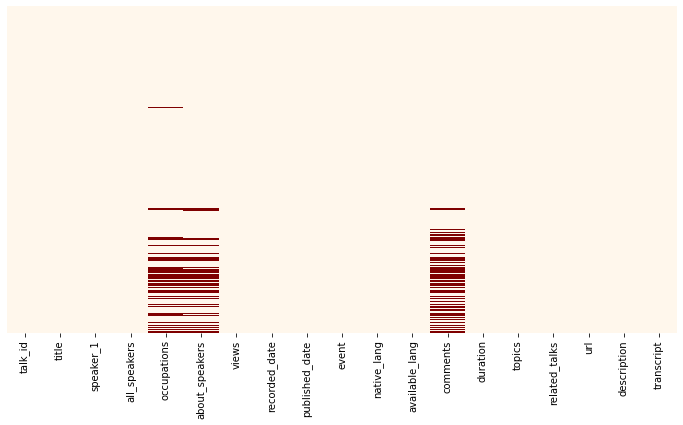

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have lotof missing values in several columns ,Therefore we will be treated after the EDA

Here many columns have the data in the form of a string and dictionaries .To acess the data and to build model,we sould have cleaned data which can be easily acessed .So we are converting all colummns to its proper datatype

In [ ]:
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.

Here ,some of the mmissing values are treated which missinng values % was very less.its done becaues it will give better visualizations in our EDA .

In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date ,Month and year columns are converted to its proper Datetimme datatype.

In [ ]:
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')
#converting the published and recorded date as datetime datatype

In [ ]:
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)
#finding out the respected day,month and year

In [ ]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)
#again converting the month which was in numbers to exact month names

In [ ]:
tedtalk_df.head(2)

title     speaker_1  \
0      Averting the climate crisis       Al Gore   
1  The best stats you've ever seen  Hans Rosling   

                              occupations  \
0                      [climate advocate]   
1  [global health expert; data visionary]   

                                      about_speakers     views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...   3523392    2006-02-25   
1  In Hans Rosling’s hands, data sings. Global tr...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript release_day  \
0  Thank you so much, Chris. And it's truly a gre...     Tuesday   
1  About 10 years ago, I took on the task to teac...     Tuesday   

  release_month  release_year  
0          June          2006  
1          June          2006

In [ ]:
ted_talk_df = tedtalk_df.copy()

In [ ]:
tedtalk_df.head(2)

title     speaker_1  \
0      Averting the climate crisis       Al Gore   
1  The best stats you've ever seen  Hans Rosling   

                              occupations  \
0                      [climate advocate]   
1  [global health expert; data visionary]   

                                      about_speakers     views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...   3523392    2006-02-25   
1  In Hans Rosling’s hands, data sings. Global tr...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript release_day  \
0  Thank you so much, Chris. And it's truly a gre...     Tuesday   
1  About 10 years ago, I took on the task to teac...     Tuesday   

  release_month  release_year  
0          June          2006  
1          June          2006

Now that a basic level cleaning of dataet is done we will start with the processs of EDA 

# EDA

# Speaker_1_column

**Speakers with top 20 total views wrt their numbero f talks**

In [ ]:
tedtalk_df['speaker_1'].nunique()

3274

In [ ]:
speaker_with_most_talks = pd.DataFrame(tedtalk_df['speaker_1'].value_counts()).reset_index()
speaker_with_most_talks.rename(columns={'index':'speaker_1', 'speaker_1':'num_of_talks'}, inplace=True)


speaker_total_views_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).reset_index()
#speaker with respected total views
speaker_tv_df = speaker_total_views_df.head(20).sort_values('views',ascending=False)

speaker_report = speaker_with_most_talks.merge(speaker_total_views_df,on='speaker_1').reset_index()

In [ ]:
#taking only numeric columns to do the minmaxscaling
speaker_numeric = speaker_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(speaker_numeric)
#print(scaled)
speaker_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
speaker_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
speaker_report = speaker_report.head(20)

Text(0.5, 1.0, 'Speaker with top 10 total views and number_of_talks')

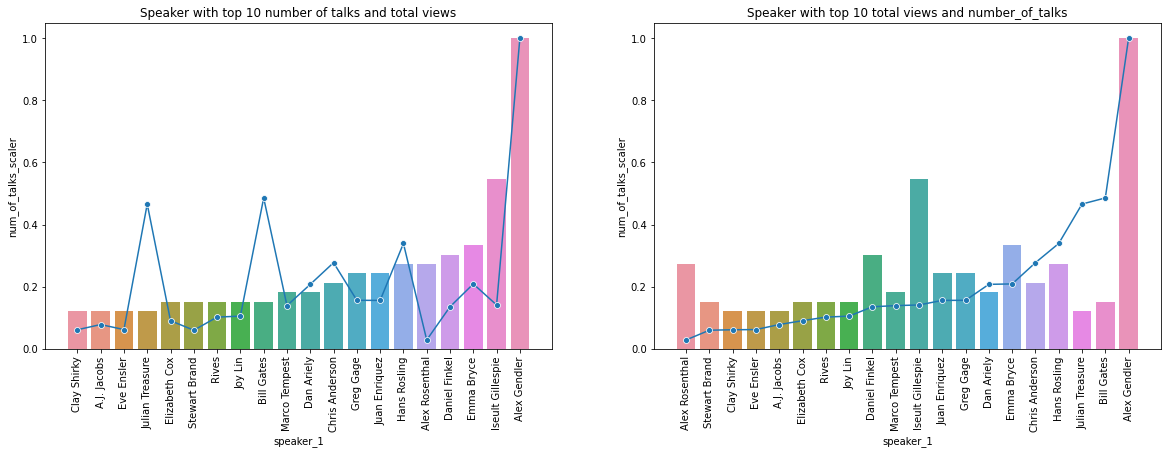

In [ ]:
# graph for speakers which has maximum talks with respect to views

# # plotting the graph

speaker_report_1 = speaker_report.sort_values('num_of_talks_scaler')
speaker_report_2 = speaker_report.sort_values('views')
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_1)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_1,marker='o')
plt.title('Speaker with top 10 number of talks and total views')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_2)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_2,marker='o')
plt.title('Speaker with top 10 total views and number_of_talks')
#speaker_report

We have the visualization for the same data from two different aspect here.

1) First is the graph which contains speakerswho has given most numbers of talks and the line graph represents their views.We can observe that Bill Gates was the influneced  person. So even if his number of taks are less, he has received more number of views .So the speaker influences the number of views of the Talks.We can see somme hike in the graph for the influneced speakers.
 
 2) second is the graph which is stored according to the number odf vviews talks received .We van obser e that the number of talks is not directly contributing to the number of views talks can receive.

#**Speaker who received more number of views for one video**

In [ ]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]

speaker_1     views  \
4     Sir Ken Robinson  65051954   
1296         Amy Cuddy  57074270   
2062      James Veitch  56932551   
646        Simon Sinek  49730580   
796        Brené Brown  47544833   
1724   Julian Treasure  41504331   
2108         Tim Urban  37976820   
1366   Cameron Russell  33874546   
2724         Sam Berns  33691484   
1898        Bill Gates  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

<AxesSubplot:title={'center':'most views received for the single video by speaker'}, xlabel='speaker_1', ylabel='views'>

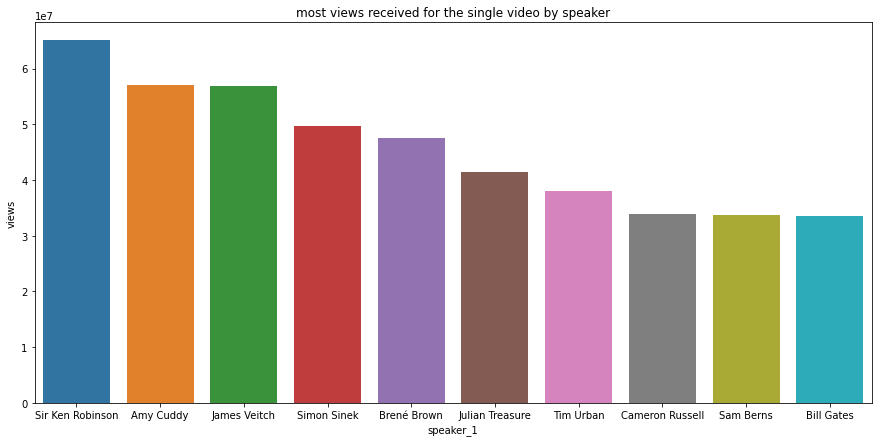

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most views received for the single video by speaker")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

This graph represents the maximum views a single video recived .Sir Ken Robinson is the ione whi recived maxximmum number for a single video 

#**Occupations column**

**Top occupations of the speaker**

In [ ]:

tedtalk_df['speaker_occupation']=pd.Series()
for i in range(len(tedtalk_df)):
  tedtalk_df.loc[i,'speaker_occupation'] = tedtalk_df['occupations'][i][0]

In [ ]:
tedtalk_df['speaker_occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                   other
4002                          law researcher
4003                                   other
4004                                   other
Name: speaker_occupation, Length: 4005, dtype: object

In [ ]:
tedtalk_df.drop('occupations',axis=1,inplace=True)

In [ ]:
tedtalk_df['speaker_occupation'].nunique()

1552

By this we can observe that there are 1552 different occupations for the respective speakers in TED talk videos 

In [ ]:
speaker_occupations_df = pd.DataFrame(tedtalk_df['speaker_occupation'].value_counts()).reset_index()
speaker_occupations_df.rename(columns={'index':'Occupations', 'speaker_occupation':'Number_of_speakers'}, inplace=True)

occupations_with_most_views = tedtalk_df.groupby(['speaker_occupation'],dropna=True)['views'].mean().reset_index()
occupations_with_most_views.rename(columns={'speaker_occupation':'Occupations', 'views':'views'}, inplace=True)

occupation_report = speaker_occupations_df.merge(occupations_with_most_views,on='Occupations')


In [ ]:
#taking only numeric columns to do the minmaxscaling
occupation_numeric = occupation_report[['Number_of_speakers','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(occupation_numeric)
#print(scaled)
occupation_report ['Number_of_speakers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
occupation_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Occupations with average views and respected number of speakers')

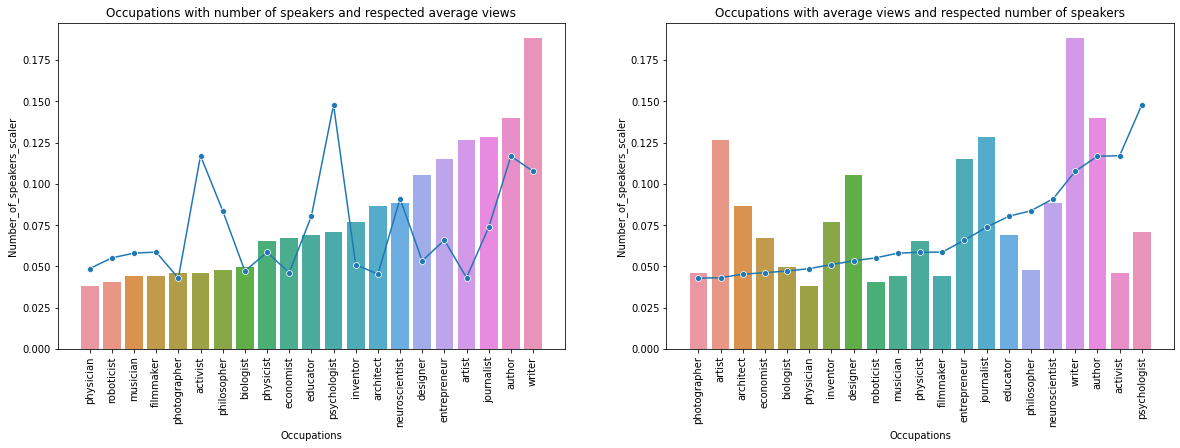

In [ ]:
# graph for occupation which has maximum talks with respect to views

# # plotting the graph

occupation_report_1 = occupation_report.sort_values('Number_of_speakers')
occupation_report_2 = occupation_report.sort_values('views')

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_1)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_1,marker='o')
plt.title('Occupations with number of speakers and respected average views')



plt.subplot(1, 2, 2)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_2)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_2,marker='o')
plt.title('Occupations with average views and respected number of speakers')



Again we have 2 representation of the same graphs, once sorted according to the number of talks then according to the number of views.

(1) In first graph, we can see that, again number of talks for the respective occupations are not directly contributing to the number of views. Instead the type of occupations are bringinfg a hike in number of views. For example, psychology (which everybody loves to listen about) and Activist (Who will make everybody listen to them by theri words). The occupations (might be their skills to talk to) does matter in number of views.

(2) Second graph contains the grapph which is sorted according to the number of views. We can See that the top 3 views were received by Psychologist, Activist and Author who all are very good in making people love what they speak.

#**Occupations which received maximum number of views for a single video**

In [ ]:

most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_occupation','views','title']]

speaker_occupation     views  \
4                       author  65051954   
1296       social psychologist  57074270   
2062       comedian and writer  56932551   
646          leadership expert  49730580   
796   vulnerability researcher  47544833   
1724          sound consultant  41504331   
2108                   blogger  37976820   
1366                     model  33874546   
2724                  activist  33691484   
1898            philanthropist  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

<AxesSubplot:title={'center':'most viewd video_Occupation'}, xlabel='speaker_occupation', ylabel='views'>

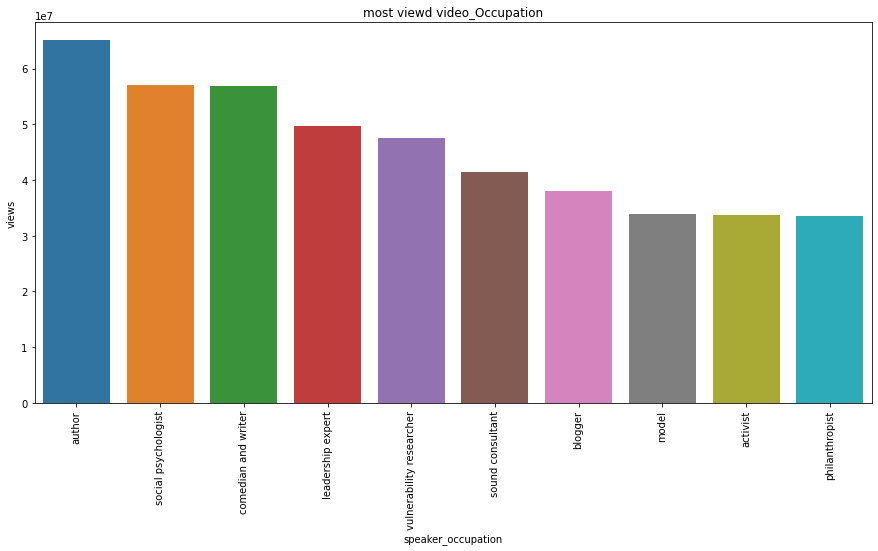

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most viewd video_Occupation")
plt.xticks(rotation=90)
sns.barplot(x='speaker_occupation',y='views',data=most_popular_video_df)

we can observe that the maximum number of views for a single video was received by the occuppations Author followed by Psychologist .

#**Published date and released date**

**Findiing out on which day most of the vidoes were released**

In [ ]:
#creating a df which holds the number of talks on each day
talk_rel_day_df = pd.DataFrame(tedtalk_df['release_day'].value_counts()).reset_index()
talk_rel_day_df.rename(columns={'index':'release_day', 'release_day':'num_of_talks'}, inplace=True)

#creating another df which holds the record of views on each day
popular_day = tedtalk_df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

#merging both df
talk_day_report = talk_rel_day_df.merge(popular_day,on='release_day')

talk_day_report

release_day  num_of_talks         views
0     Tuesday           857  2.025352e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
3      Monday           727  1.953866e+06
4   Wednesday           703  2.293402e+06
5      Sunday            55  1.458068e+06
6    Saturday            42  9.821678e+05

In [ ]:
#Sorting the days by using another dataframe with the day values

day_value = pd.DataFrame([['Sunday',0],['Monday',1],['Tuesday',2],['Wednesday',3],['Thursday',4],['Friday',5],['Saturday',6]])
day_value.rename(columns={0:'release_day',1:'Day_value'},inplace=True)
day_value
talk_day_report = talk_day_report.merge(day_value,on='release_day')

talk_day_report

release_day  num_of_talks         views  Day_value
0     Tuesday           857  2.025352e+06          2
1    Thursday           832  1.907994e+06          4
2      Friday           789  2.693812e+06          5
3      Monday           727  1.953866e+06          1
4   Wednesday           703  2.293402e+06          3
5      Sunday            55  1.458068e+06          0
6    Saturday            42  9.821678e+05          6

In [ ]:
talk_day_report = talk_day_report.sort_values('Day_value',ascending=True)
talk_day_report = talk_day_report.drop('Day_value',axis=True)
talk_day_report

release_day  num_of_talks         views
5      Sunday            55  1.458068e+06
3      Monday           727  1.953866e+06
0     Tuesday           857  2.025352e+06
4   Wednesday           703  2.293402e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
6    Saturday            42  9.821678e+05

In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_day_numeric = talk_day_report[['num_of_talks','views']]
print(talk_day_numeric)
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_day_numeric)
#print(scaled)
talk_day_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_day_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

   num_of_talks         views
5            55  1.458068e+06
3           727  1.953866e+06
0           857  2.025352e+06
4           703  2.293402e+06
1           832  1.907994e+06
2           789  2.693812e+06
6            42  9.821678e+05


In [ ]:
talk_day_report

release_day  num_of_talks         views  num_of_talks_scaler  views_scaler
5      Sunday            55  1.458068e+06             0.916564      1.000000
3      Monday           727  1.953866e+06             0.811043      0.766067
0     Tuesday           857  2.025352e+06             0.015951      0.278037
4   Wednesday           703  2.293402e+06             0.969325      0.540899
1    Thursday           832  1.907994e+06             0.840491      0.567699
2      Friday           789  2.693812e+06             1.000000      0.609463
6    Saturday            42  9.821678e+05             0.000000      0.000000

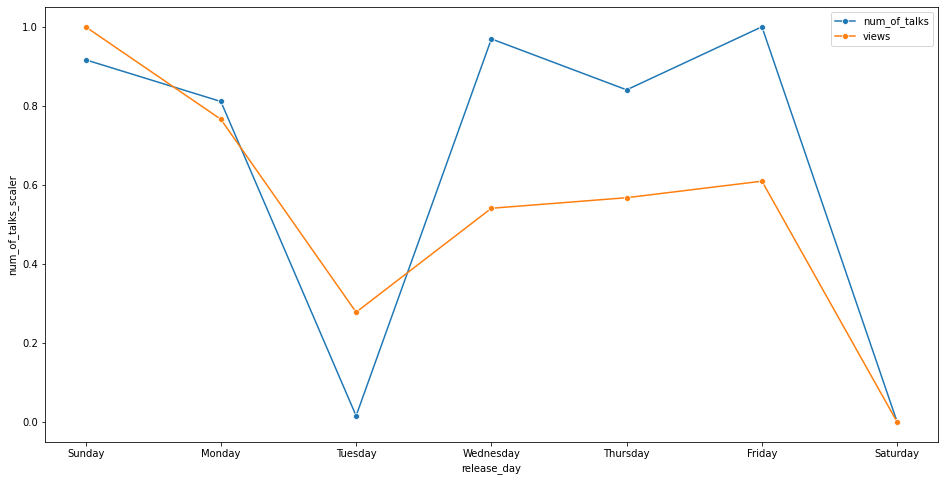

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_day_report.iloc[:,3:]:
  sns.lineplot(data=talk_day_report,x='release_day',y=i,marker='o')

plt.legend(labels=talk_day_numeric)


We can observe in this graph about the comparision of number of talks and as well as the number of views a particular day received. We can see that on saturday the number of talks and as well as the number of views were low. And on Sunday, Wednesday and Friday the release were high. But the number of views were high only on Sunday.

It may seem that only on weekends people were interested to give a time for TED talk videos.

#**Month**

In [ ]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=e2141e016d621e80a67fd6fb2870645a620c988d2c19368fd9bdd1a7114a1092
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=f2582213b91f9b01daf211da02dc48effd1244e170bbb4018cb534b73b41f5c2
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


In [ ]:
# creating data frame for num of talks in a particular month 
talk_rel_month_df = pd.DataFrame(tedtalk_df['release_month'].value_counts()).reset_index()
talk_rel_month_df.rename(columns={'index':'release_month', 'release_month':'num_of_talks'}, inplace=True)

#Printing the most popular release month according to average Views
popular_month = tedtalk_df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'}).sort_values('release_month').reset_index()

#merging two dataframes which has number of talks and views received in the same df
talk_month_report = talk_rel_month_df.merge(popular_month,on='release_month')

#sorting according to month in here
talk_month_report = Sort_Dataframeby_Month(df=talk_month_report ,monthcolumnname='release_month')



In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_month_numeric = talk_month_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_month_numeric)
#print(scaled)
talk_month_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_month_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:

talk_month_report

release_month  num_of_talks         views  num_of_talks_scaler  \
0            Jan           348  2.014319e+06             0.598930   
1            Feb           412  2.135949e+06             0.941176   
2          March           419  2.644200e+06             0.978610   
3          April           423  2.180815e+06             1.000000   
4            May           312  2.449977e+06             0.406417   
5           June           310  2.125505e+06             0.395722   
6           July           278  2.127899e+06             0.224599   
7            Aug           236  1.884180e+06             0.000000   
8            Sep           347  2.224862e+06             0.593583   
9            Oct           350  1.909282e+06             0.609626   
10           Nov           305  1.746111e+06             0.368984   
11           Dec           265  2.109443e+06             0.155080   

    views_scaler  
0       0.298644  
1       0.434075  
2       1.000000  
3       0.484033  
4       0.783738  
5       0.422446  
6       0.425112  
7       0.153737  
8       0.533078  
9       0.181687  
10      0.000000  
11      0.404562

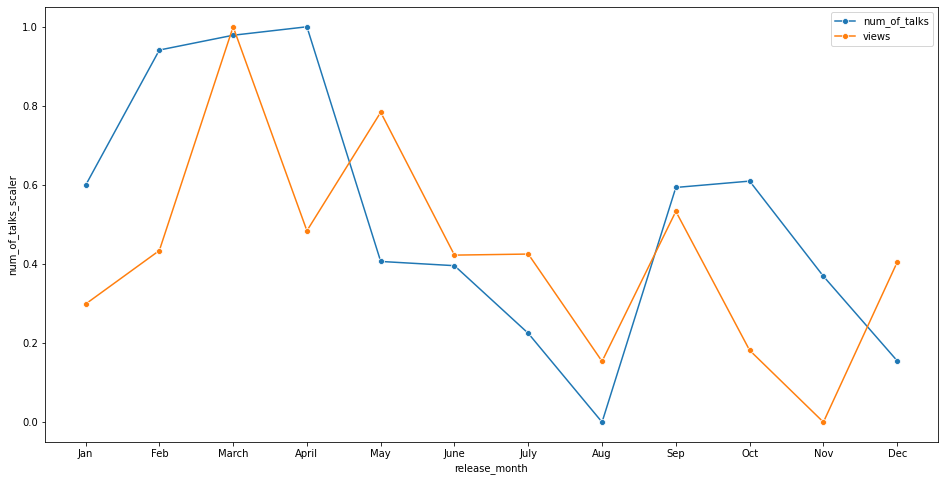

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_month_report.iloc[:,3:]:
  sns.lineplot(data=talk_month_report,x='release_month',y=i,marker='o')

plt.legend(talk_month_numeric)


Here we can observe that it has the comparision wise line graph for number of talks and number of views for the respective month.

Most number of videos wwere released on the month of April where the lease was released on the month of August. But the number of views were maximum for the videos which were released on the minth of March and it was lease for the videos of Novemb

#**YEAR**

In [ ]:
talk_rel_year_df = pd.DataFrame(tedtalk_df['release_year'].value_counts()).reset_index()
talk_rel_year_df.rename(columns={'index':'release_year', 'release_year':'num_of_talks'}, inplace=True)

popular_year = tedtalk_df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'}).sort_values('release_year',ascending=False).reset_index()

talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')


In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_year_numeric = talk_year_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_year_numeric)
#print(scaled)
talk_year_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_year_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:
talk_year_report

release_year  num_of_talks         views  num_of_talks_scaler  \
14          2006            49  4.937003e+06             0.248086   
13          2007           119  1.848977e+06             1.000000   
12          2008           185  1.810979e+06             0.655436   
10          2009           215  2.071610e+06             0.295559   
8           2010           230  2.188767e+06             0.292496   
4           2011           255  1.932456e+06             0.277182   
3           2012           303  2.196281e+06             0.254211   
5           2013           242  3.012435e+06             0.315467   
7           2014           240  2.423564e+06             0.295559   
9           2015           220  2.806775e+06             0.261868   
6           2016           242  2.734725e+06             0.388974   
2           2017           315  2.160378e+06             0.208270   
1           2018           477  1.826209e+06             0.107198   
0           2019           702  1.939608e+06             0.000000   
11          2020           211  9.267452e+05             0.407351   

    views_scaler  
14      0.000000  
13      0.252568  
12      0.224291  
10      0.450839  
8       0.373247  
4       0.314698  
3       0.285484  
5       0.250785  
7       0.520089  
9       0.468805  
6       0.316572  
2       0.220493  
1       0.229968  
0       1.000000  
11      0.307619

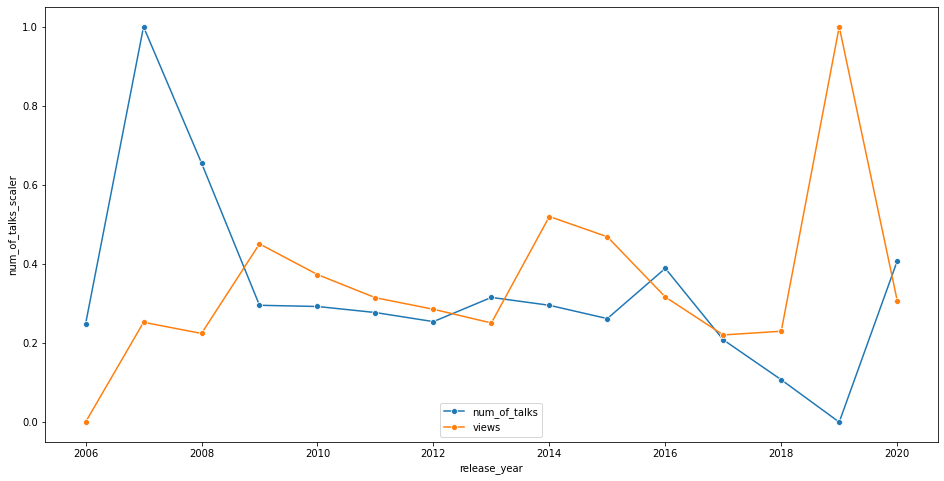

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_year_report.iloc[:,3:]:
  sns.lineplot(data=talk_year_report,x='release_year',y=i,marker='o')
plt.legend(labels=talk_year_numeric)

We can observe the line graph for almost 20 years of number of talks and number of views. We can conclude that Number of talks were morein old days but eventually it was reduced hit the minimum in 2019. It hits the hike in 2007 though. But the number of views were gradually increasing from year to year with a little bit of ups and downs. It was high during the 2019 when the number of talks were minimum.

**To view the number of views recieved per day on monthly basis**

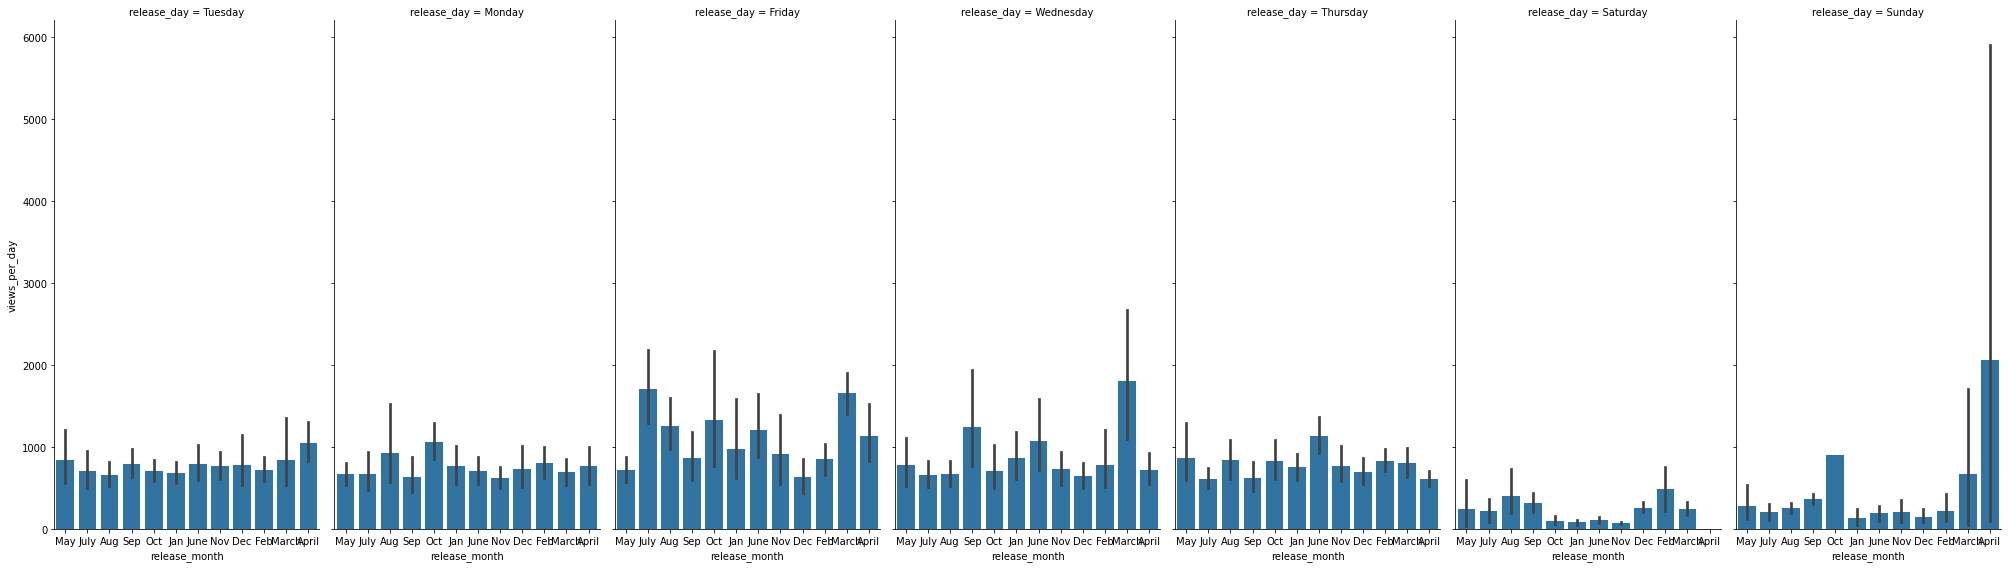

In [ ]:
from datetime import date
graph_df = tedtalk_df.copy()
g = sns.FacetGrid(graph_df, col='release_day', height=8, aspect=.5)
td = pd.to_datetime(date.today(), format='%Y-%m-%d')
graph_df['video_age'] = (td - tedtalk_df['published_date']).apply(lambda x: x.days)
graph_df['views_per_day'] = graph_df['views'] / ( graph_df['video_age'] + 1 )
g.map(sns.barplot, 'release_month', 'views_per_day')


**Comment and duration columns**

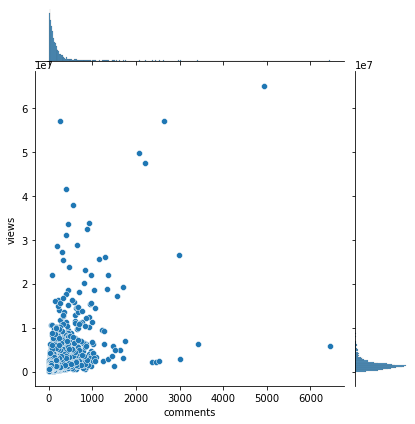

In [ ]:
sns.jointplot(data=tedtalk_df,x='comments', y='views')

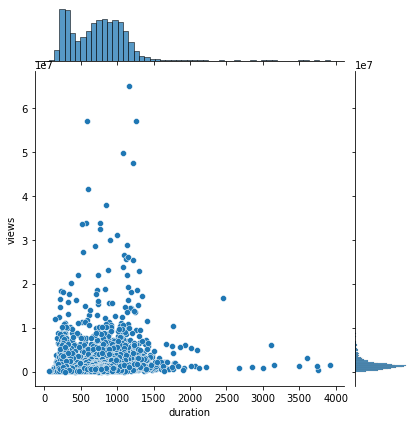

In [ ]:
sns.jointplot(data=tedtalk_df,x='duration', y='views')

<AxesSubplot:xlabel='duration', ylabel='Density'>

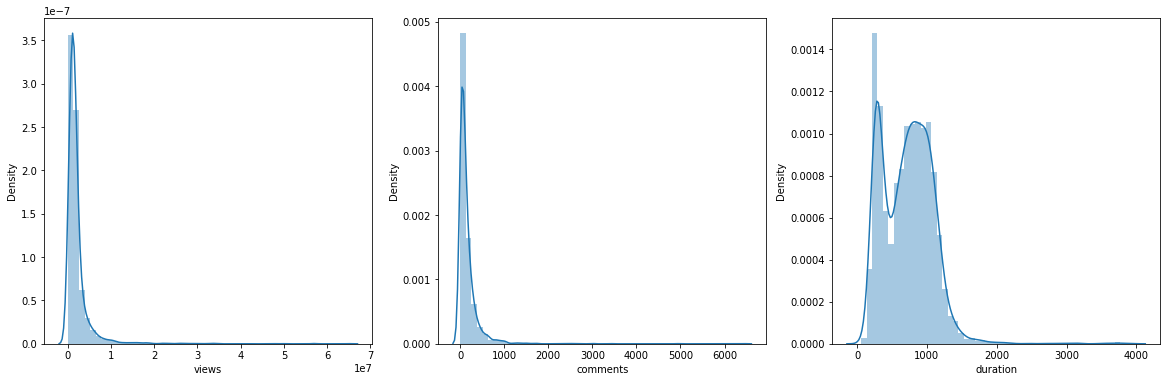

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(tedtalk_df['views'])
plt.subplot(1,3,2)
sns.distplot(tedtalk_df['comments'])
plt.subplot(1,3,3)
sns.distplot(tedtalk_df['duration'])


we can observe the data distribution of the numerical columns views ,comments and duration

#**Events with respect to talk and views**

In [ ]:
#count of events

event_count_df = pd.DataFrame(tedtalk_df['event'].value_counts()).reset_index()
event_count_df.rename(columns={'index':'event', 'event':'num_of_talks'}, inplace=True)

#event with max views
popular_event=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

event_report = event_count_df.merge(popular_event,on='event')



In [ ]:
#taking only numeric columns to do the minmaxscaling
event_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(event_numeric)
#print(scaled)
event_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
event_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

Text(0.5, 1.0, 'Events with top 10 views followed by their number of talks')

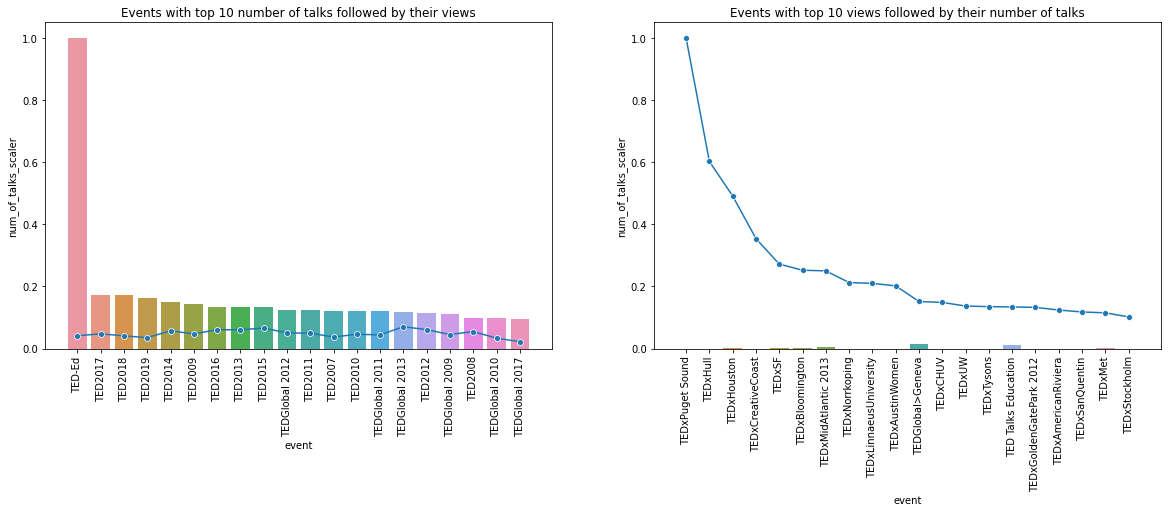

In [ ]:
# graph for event which has maximum talks with respect to views
event_talk_views_report_1 = event_report.sort_values('num_of_talks',ascending=False).head(20)
event_talk_views_report_2 = event_report.sort_values('views',ascending=False).head(20)
# # plotting the graph

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_1)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_1,marker='o')
plt.title('Events with top 10 number of talks followed by their views')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_2)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_2,marker='o')
plt.title('Events with top 10 views followed by their number of talks')


This graph represents the number of views for the different views along with the number of talks. We can observe that the count of number of talks of event did not really matter for views. For top 10 events in the first graph, the number of views is almost the same. And in the second graph, for the top 10 nummber of views, event's number of talks were very low

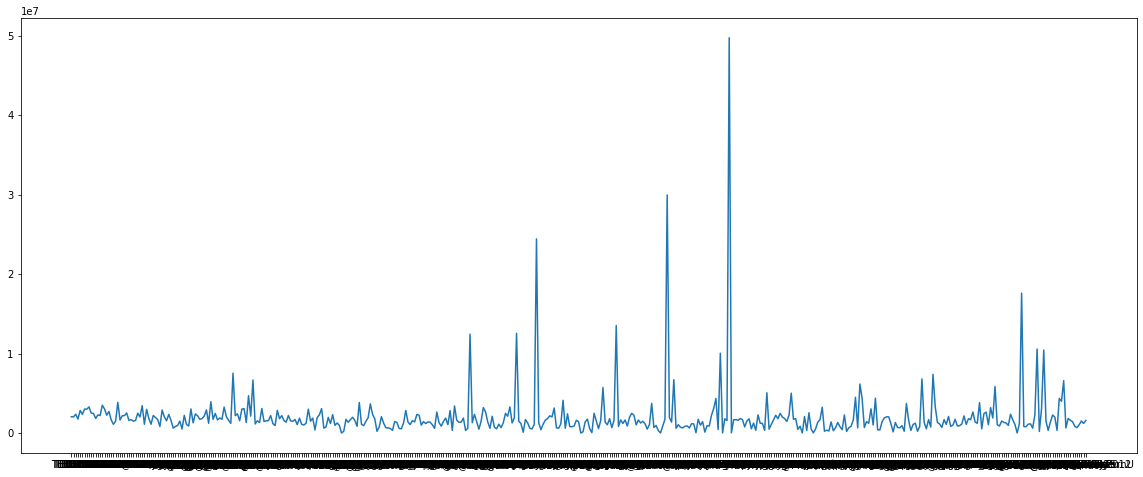

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(event_report['event'],event_report['views'])

This explains about the diffrent events with respect to the nummer of views .And we can see some hikes in number of views for very few events in here .

#**Native lang column**

In [ ]:
tedtalk_df['native_lang'].nunique()

12

In [ ]:
native_lang_df = pd.DataFrame(tedtalk_df['native_lang'].value_counts()).reset_index()

native_lang_df.rename(columns={'index':'native_lang', 'native_lang':'num_of_talks'}, inplace=True)

#event with max views
popular_lang=tedtalk_df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

lang_report = native_lang_df.merge(popular_lang,on='native_lang')

In [ ]:
#taking only numeric columns to do the minmaxscaling
lang_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(lang_numeric)
#print(scaled)
lang_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
lang_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

native_lang  num_of_talks         views  num_of_talks_scaler  views_scaler
0           en          3957  2.163597e+06             1.000000      0.041120
1           es            27  6.898032e+05             0.171171      0.040824
2           fr             9  9.825846e+05             0.171171      0.047425
3           ja             3  6.802843e+05             0.162162      0.035154
4           hi             2  5.768520e+05             0.149550      0.057226
5           de             1  8.848810e+05             0.144144      0.047162
6           pt             1  3.475180e+05             0.133333      0.060661
7           ko             1  2.057706e+06             0.133333      0.060288
8        zh-cn             1  1.368494e+06             0.133333      0.066117
9           ar             1  1.452611e+06             0.124324      0.050363
10       pt-br             1  1.167889e+06             0.124324      0.049576
11          it             1  3.466037e+06             0.120721      0.037102

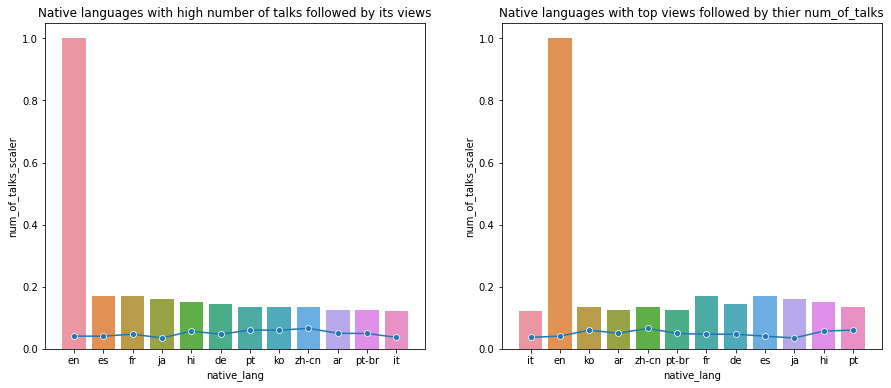

In [ ]:
# graph for langauges which has maximum talks with respect to views
#lang_report.sort_values('views',ascending=False,inplace=True)
# # plotting the graph
lang_report_1 = lang_report.sort_values('num_of_talks',ascending=False)
lang_report_2 = lang_report.sort_values('views',ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_1)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_1,marker='o')
plt.title('Native languages with high number of talks followed by its views')

plt.subplot(1,2,2)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_2)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_2,marker='o')
plt.title('Native languages with top views followed by thier num_of_talks')

lang_report


We can see the different native languages avaliable, number of talks in those languages and number of views it received. In the first graph we can see the charts which are sorted according to the number of talks. Obviously english being the common langauge, has most numer of talks. But it did not ensure abou tthe number of views. The second graph contains the charts which are sorted according to number of views. And we can see that Portuguese has received maximum average views for its talks.

# Available lang column

**subtitles count for all videos**

**bold text**

In [ ]:
lang_dict = {}
for i in tedtalk_df.to_dict('records'):
   tmp = i['available_lang']
   for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1 
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).head(20).reset_index().sort_values('count',ascending=False)



In [ ]:
lang_df

index  count
5      en   4005
6      es   3915
8      fr   3863
0      ar   3841
19     ko   3755
18     ja   3482
17     it   3459
12     he   3295
7      fa   3009
15     hu   2871
3      de   2698
4      el   2538
1      bg   2148
14     hr   1856
16     id   1733
2      cs   1543
13     hi    502
9   fr-ca    334
10     gl    323
11     gu    164

Text(0, 0.5, 'Counts')

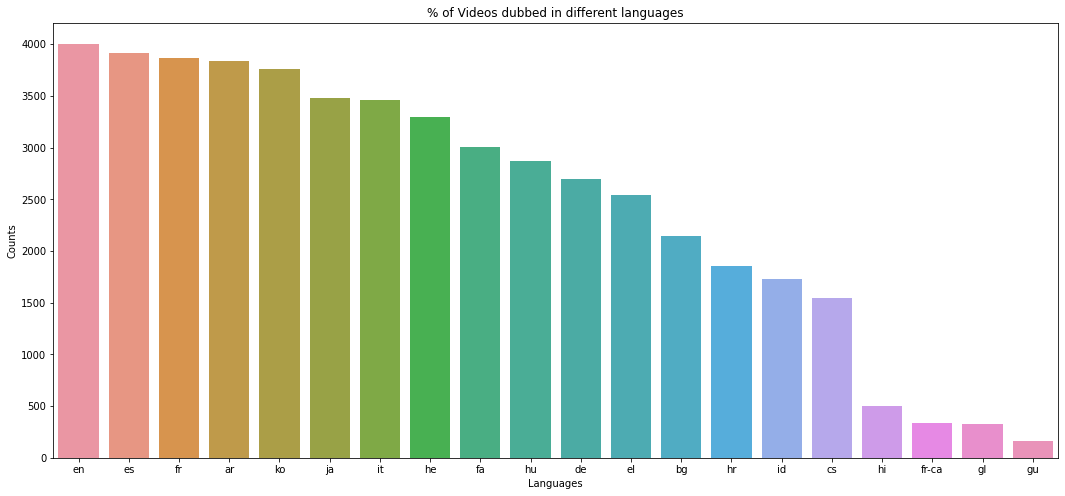

In [ ]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')


This graph gives the idea about how many languages were availble as subtitles for the videos ,and again English commes in top as its the common language all over the world

**Topic column**

In [ ]:
tedtalk_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [ ]:
topics_df = pd.DataFrame(tedtalk_df['topics'].explode().value_counts().reset_index()).iloc[:,0:]
topics_df.rename(columns={'index':'Topics','topics':'Number_of_talks'},inplace=True)



<AxesSubplot:xlabel='Topics', ylabel='Number_of_talks'>

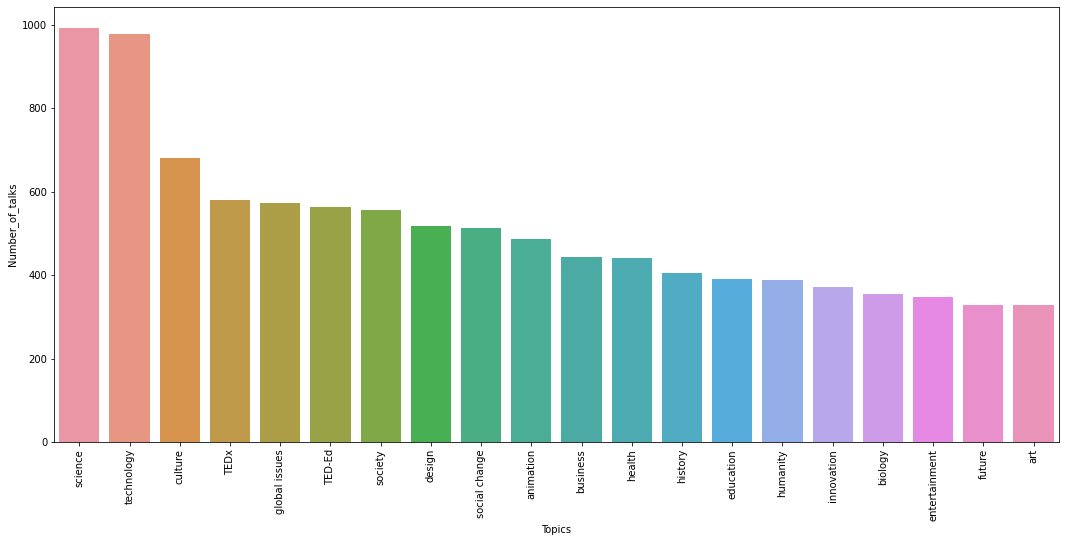

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Topics',y='Number_of_talks',data=topics_df.head(20))

we can see thet the most TED talks were about science and technology .


**Wordcloud for topics**

In [ ]:
from wordcloud import WordCloud
text = " ".join(topics_df['Topics'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'white').generate(text)

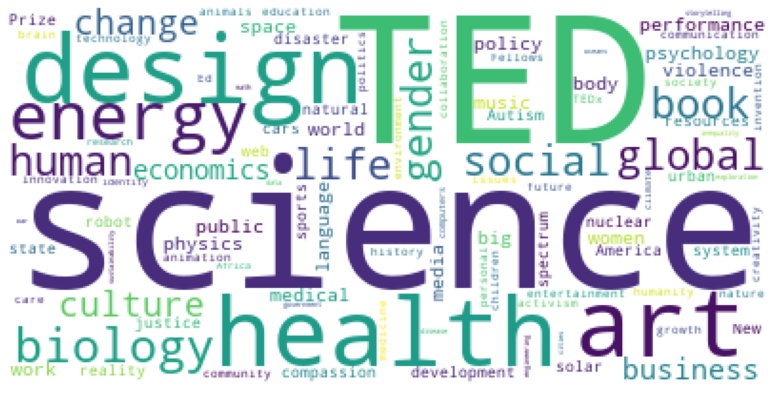

In [ ]:
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Description column**

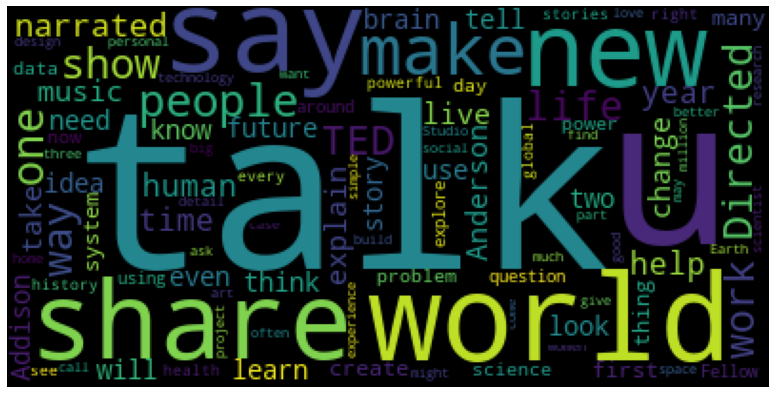

In [ ]:
text = " ".join(tedtalk_df['description'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'black').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Title column**

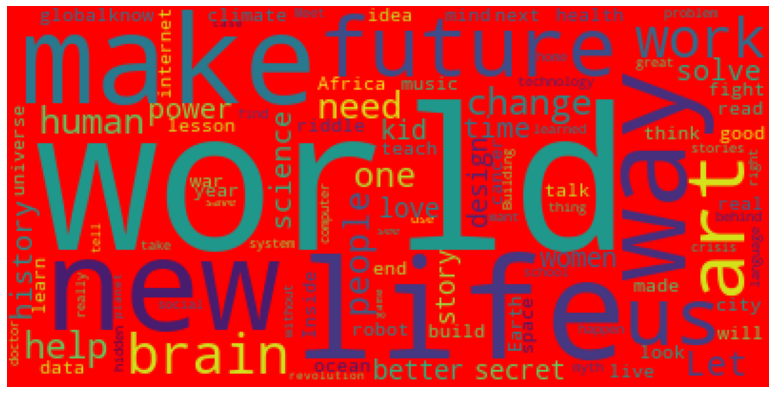

In [ ]:
text = " ".join(tedtalk_df['title'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'red').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Heatmap**

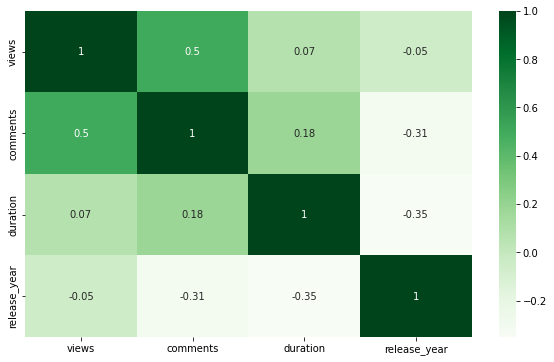

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(tedtalk_df.corr(),2),annot=True,cmap='Greens');

Trying to get a correlation matrix with visualization for the numeric columns.We can observe no 2 column share correlation more than 60%

#**Missing values in comments**

In [ ]:
td_talk_df_2 = tedtalk_df.copy()

<AxesSubplot:xlabel='comments', ylabel='Density'>

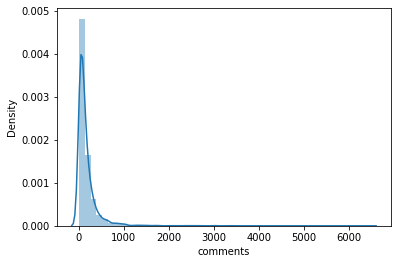

In [ ]:
sns.distplot(tedtalk_df.comments.dropna())

In [ ]:
numeric_df = tedtalk_df[['views','comments','duration']]

As more than 3% of the data were missing in comments ,we tried using the KNN imouter to predict the missing values ion here .

In [ ]:
#KNN to find the missing values

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Doing dummy for categorical variables
numeric_df = pd.get_dummies(numeric_df)

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_df['comments'] = imputer.fit_transform((numeric_df['comments'].values.reshape(-1,1)))

<AxesSubplot:xlabel='comments', ylabel='Density'>

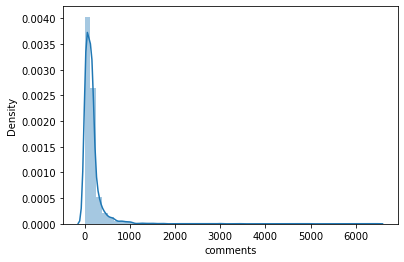

In [ ]:
sns.distplot(numeric_df['comments'])

In [ ]:
tedtalk_df['comments']=numeric_df['comments']
tedtalk_df.isna().sum()

title                 0
speaker_1             0
about_speakers        0
views                 0
recorded_date         0
published_date        0
event                 0
native_lang           0
available_lang        0
comments              0
duration              0
topics                0
related_talks         0
description           0
transcript            0
release_day           0
release_month         0
release_year          0
speaker_occupation    0
dtype: int64

In [ ]:
ted_talk_3_df = tedtalk_df.copy()


# **Handling Outliers**

In [ ]:
tedtalk_df.describe().T
#we can see that we have only numerical columns in here.
#talk_id is the unique number which should not be considered
#views is the dependent variable which should not be considered
# so we consider only comments and duration.

count          mean           std     min       25%        50%  \
views         4005.0  2.148006e+06  3.451226e+06     0.0  882069.0  1375508.0   
comments      4005.0  1.619970e+02  2.458684e+02     0.0      46.0      119.0   
duration      4005.0  7.240112e+02  3.617755e+02    60.0     393.0      738.0   
release_year  4005.0  2.014597e+03  3.991930e+00  2006.0    2011.0     2015.0   

                    75%         max  
views         2133110.0  65051954.0  
comments          162.0      6449.0  
duration          974.0      3922.0  
release_year     2018.0      2020.0

In [ ]:
continous = ['comments','duration']

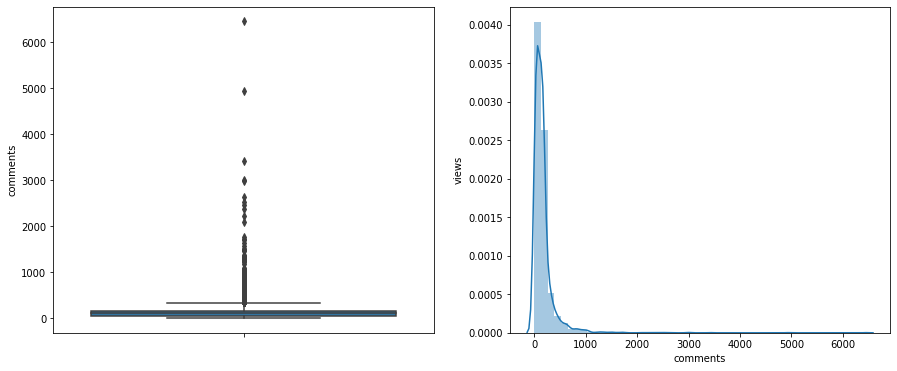

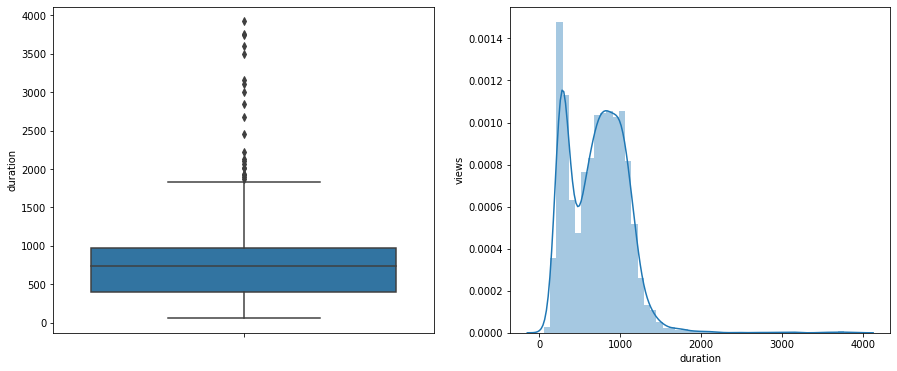

In [ ]:
for var in continous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=tedtalk_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(tedtalk_df[var])
    fig.set_ylabel('views')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
 tedtalk_df[['comments','duration']].describe().T

count        mean         std   min    25%    50%    75%     max
comments  4005.0  161.997015  245.868383   0.0   46.0  119.0  162.0  6449.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:

#comments
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['comments'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['comments']>upper,'comments'] = upper

<AxesSubplot:xlabel='comments', ylabel='Density'>

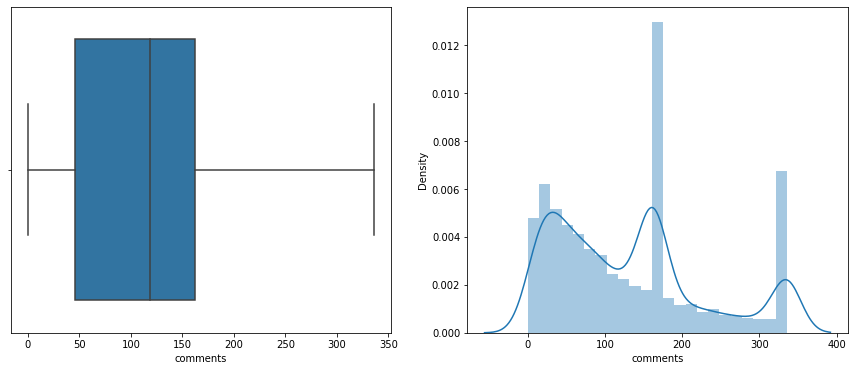

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['comments'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['comments'])

In [ ]:
tedtalk_df[['comments','duration']].describe().T

count        mean         std   min    25%    50%    75%     max
comments  4005.0  131.469175   98.182881   0.0   46.0  119.0  162.0   336.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:
#duration
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['duration'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['duration']>upper,'duration'] = upper
#borderizing the outliers

<AxesSubplot:xlabel='duration', ylabel='Density'>

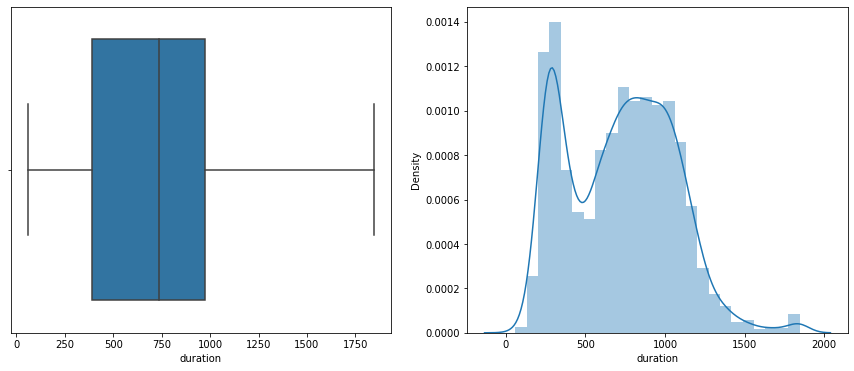

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['duration'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['duration'])
# plt.figure(figsize=(15,6))
# plt.subplot(1, 2, 1)
# sns.boxplot(tedtalk_df['duration'])
# plt.subplot(1, 2, 2)
# sns.distplot(tedtalk_df['duration'])

Here to treat outliers, we have used IQR method. Whatever the data were more than the Q3+1.5*IQR we tried equating it into upper range only. Only Comments and duration were treated this way.

To treat outliers in views cl=olumn which was a dependent column we tried using the Z score.

<AxesSubplot:xlabel='views', ylabel='Density'>

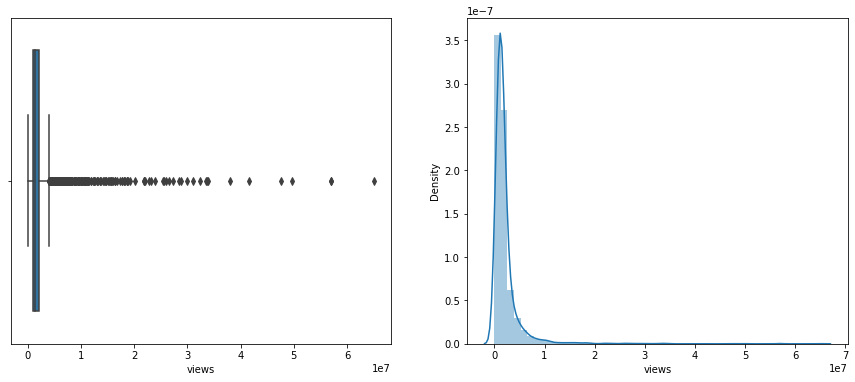

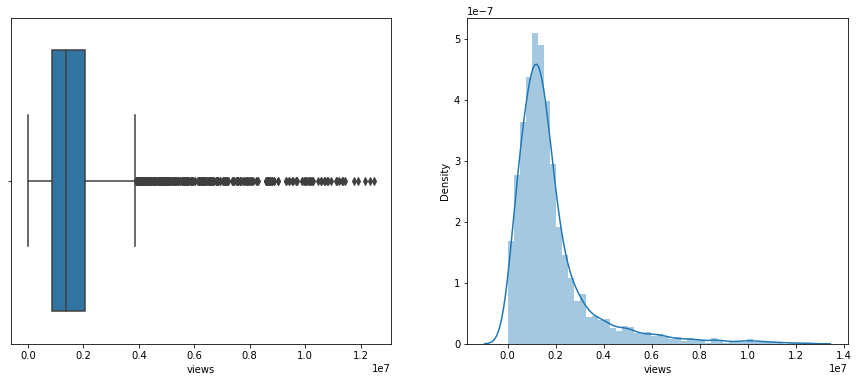

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])


tedtalk_df = tedtalk_df[((tedtalk_df['views'] - tedtalk_df['views'].mean()) / tedtalk_df['views'].std()).abs() < 3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])

In [ ]:
ted_talk_2_df = tedtalk_df.copy()

In [ ]:
tedtalk_df = tedtalk_df.reset_index()

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3945 non-null   int64         
 1   title               3945 non-null   object        
 2   speaker_1           3945 non-null   object        
 3   about_speakers      3945 non-null   object        
 4   views               3945 non-null   int64         
 5   recorded_date       3945 non-null   datetime64[ns]
 6   published_date      3945 non-null   datetime64[ns]
 7   event               3945 non-null   object        
 8   native_lang         3945 non-null   object        
 9   available_lang      3945 non-null   object        
 10  comments            3945 non-null   float64       
 11  duration            3945 non-null   float64       
 12  topics              3945 non-null   object        
 13  related_talks       3945 non-null   object      

# **Feature Engineering**

In [ ]:
from datetime import date
today = pd.to_datetime(date.today(), format='%Y-%m-%d')

In [ ]:
#creating a column with video age
tedtalk_df['video_age'] = (today - tedtalk_df['published_date']).apply(lambda x: x.days)
# Creating a daily views column
tedtalk_df['views_per_day'] = tedtalk_df['views'] / ( tedtalk_df['video_age'] + 1 )

In [ ]:

#Finding average views according to first speaker
tedtalk_df['speaker_1_average_views'] = tedtalk_df['speaker_1'].map(list(tedtalk_df.groupby('speaker_1').agg({'views_per_day' : 'mean'}).
                                                         sort_values(['views_per_day'],ascending=False).to_dict().values())[0])

#Finding average views according to event 
tedtalk_df['event_average_views'] = tedtalk_df['event'].map(list(tedtalk_df.groupby('event').agg({'views_per_day' : 'mean'}).
                                                 sort_values(['views_per_day'],ascending=False).to_dict().values())[0])


In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(tedtalk_df)):
  temp=tedtalk_df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)

      
# Creating a dictionary with unique topics wrt average views
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp, count = 0, 0

  for i in range(0,len(tedtalk_df)):
    temp2=tedtalk_df['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_df['views_per_day'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Creating a list and appending with average views wrt topic
topics_wise_average_views=[]
for i in range(0,len(tedtalk_df)):
  temp=0
  temp_topic=tedtalk_df['topics'][i]
  for element in temp_topic:
    temp+= unique_topics_avg_view_dict[element]
  
  topics_wise_average_views.append(temp//len(temp_topic))

In [ ]:

# Creating a new columns with average topic views
tedtalk_df['topics_wise_avg_views'] = pd.Series(topics_wise_average_views).values

# Creating a unique topics column which contain number of unique topics spoken on in an event
tedtalk_df['unique_topics'] = tedtalk_df['topics'].str.len()

In [ ]:
tedtalk_df['subtitles_count'] = tedtalk_df.available_lang.apply(lambda x: len(x))

tedtalk_df['Telecasted_after'] = (tedtalk_df['published_date'] - tedtalk_df['recorded_date']).apply(lambda x: x.days)
#creating a new variable 'telecasted after' which holds the difference between published date and recorded date


In [ ]:
tedtalk_df.head(2)

index                        title    speaker_1  \
0      0  Averting the climate crisis      Al Gore   
1      2             Simplicity sells  David Pogue   

                                      about_speakers    views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...  3523392    2006-02-25   
1  David Pogue is the personal technology columni...  1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  ...  release_year  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...  ...          2006   
1  [ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...  ...          2006   

     speaker_occupation video_age views_per_day speaker_1_average_views  \
0      climate advocate      6086    578.838837              497.089926   
1  technology columnist      6086    315.563003              510.344283   

  event_average_views topics_wise_avg_views unique_topics  subtitles_count  \
0          353.409495                 636.0             9               43   
1          353.409495                 580.0             9               26   

  Telecasted_after  
0              122  
1              123  

[2 rows x 28 columns]

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    3945 non-null   int64         
 1   title                    3945 non-null   object        
 2   speaker_1                3945 non-null   object        
 3   about_speakers           3945 non-null   object        
 4   views                    3945 non-null   int64         
 5   recorded_date            3945 non-null   datetime64[ns]
 6   published_date           3945 non-null   datetime64[ns]
 7   event                    3945 non-null   object        
 8   native_lang              3945 non-null   object        
 9   available_lang           3945 non-null   object        
 10  comments                 3945 non-null   float64       
 11  duration                 3945 non-null   float64       
 12  topics                   3945 non-

In [ ]:
df = tedtalk_df[['comments','duration','release_day','release_month','release_year',
                 'Telecasted_after','video_age','views_per_day','speaker_1_average_views','event_average_views','topics_wise_avg_views','unique_topics','subtitles_count']]
                 #taking only imp columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   release_day              3945 non-null   object 
 3   release_month            3945 non-null   object 
 4   release_year             3945 non-null   int64  
 5   Telecasted_after         3945 non-null   int64  
 6   video_age                3945 non-null   int64  
 7   views_per_day            3945 non-null   float64
 8   speaker_1_average_views  3945 non-null   float64
 9   event_average_views      3945 non-null   float64
 10  topics_wise_avg_views    3945 non-null   float64
 11  unique_topics            3945 non-null   int64  
 12  subtitles_count          3945 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 400.8+ KB


In [ ]:
df.describe().T

count         mean          std          min  \
comments                 3945.0   129.010664    96.452268     0.000000   
duration                 3945.0   717.511787   338.555275    60.000000   
release_year             3945.0  2014.625602     3.988702  2006.000000   
Telecasted_after         3945.0   306.804309   582.314211  -578.000000   
video_age                3945.0  2942.854753  1445.237577  1030.000000   
views_per_day            3945.0   776.456738   820.823645     0.000000   
speaker_1_average_views  3945.0   776.456738   750.190435     0.000000   
event_average_views      3945.0   776.456738   425.971484     9.028253   
topics_wise_avg_views    3945.0   807.472497   164.702881   415.000000   
unique_topics            3945.0     7.930038     3.896177     1.000000   
subtitles_count          3945.0    25.076299     8.837186     1.000000   

                                 25%          50%          75%          max  
comments                   46.000000   115.000000   161.997015   336.000000  
duration                  390.000000   735.000000   970.000000  1845.500000  
release_year             2011.000000  2015.000000  2018.000000  2020.000000  
Telecasted_after           42.000000   104.000000   228.000000  8804.000000  
video_age                1578.000000  2688.000000  4129.000000  6086.000000  
views_per_day             263.679273   532.043312  1022.963030  8105.612508  
speaker_1_average_views   292.131943   568.827965  1026.163904  7192.130497  
event_average_views       383.580867   755.853849  1188.461982  5917.989988  
topics_wise_avg_views     685.000000   783.000000   908.000000  1369.000000  
unique_topics               5.000000     7.000000    10.000000    33.000000  
subtitles_count            20.000000    25.000000    31.000000    73.000000

In [ ]:
df.columns

Index(['comments', 'duration', 'release_day', 'release_month', 'release_year',
       'Telecasted_after', 'video_age', 'views_per_day',
       'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

Now that morevariables are created in the above steps ,We can check for the ouliers once again to make sure that our data is free of outliers 

In [ ]:
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

In [ ]:
df.describe().columns

Index(['comments', 'duration', 'release_year', 'Telecasted_after', 'video_age',
       'views_per_day', 'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

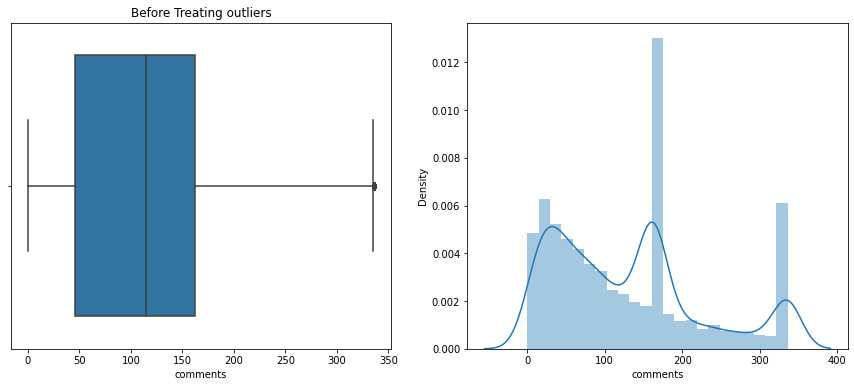

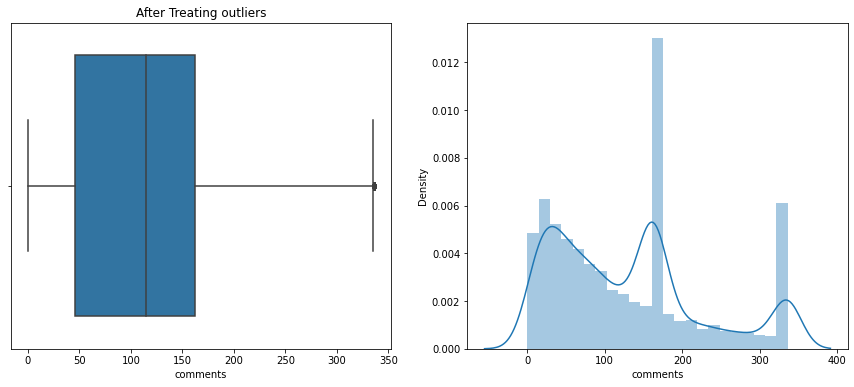

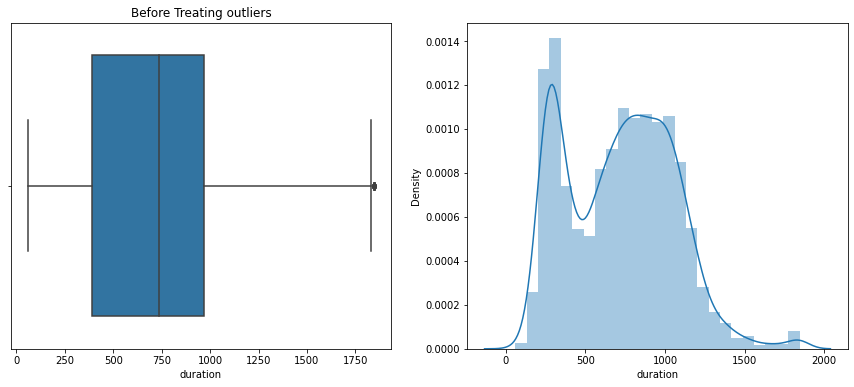

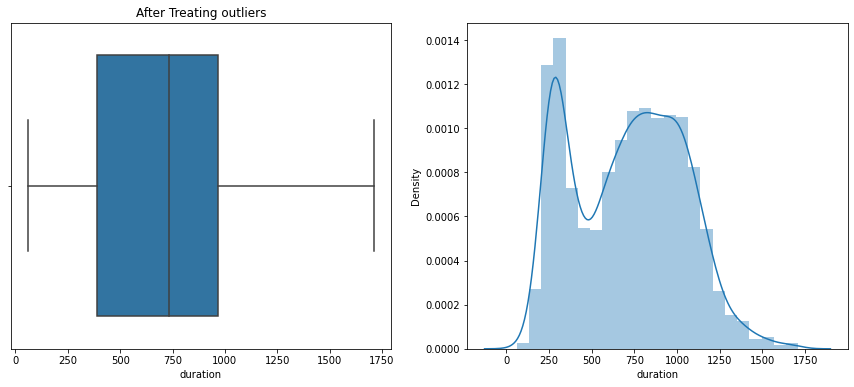

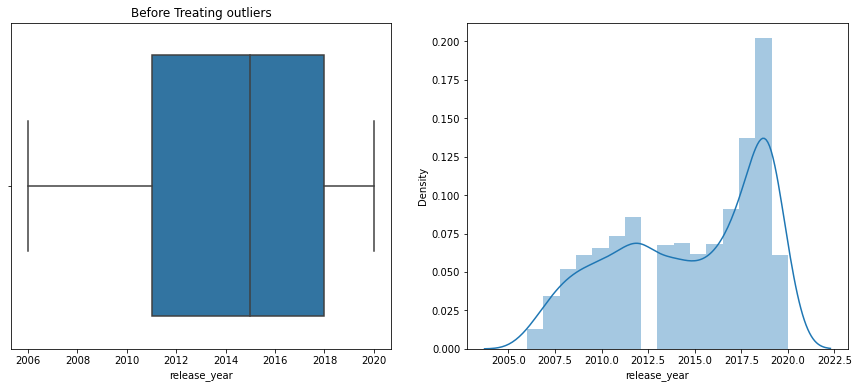

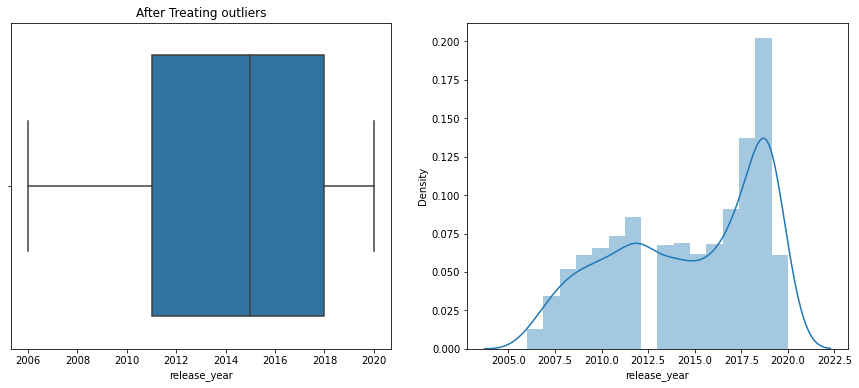

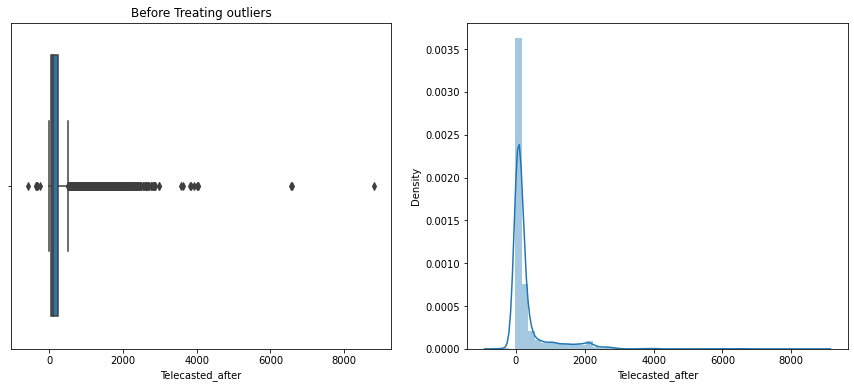

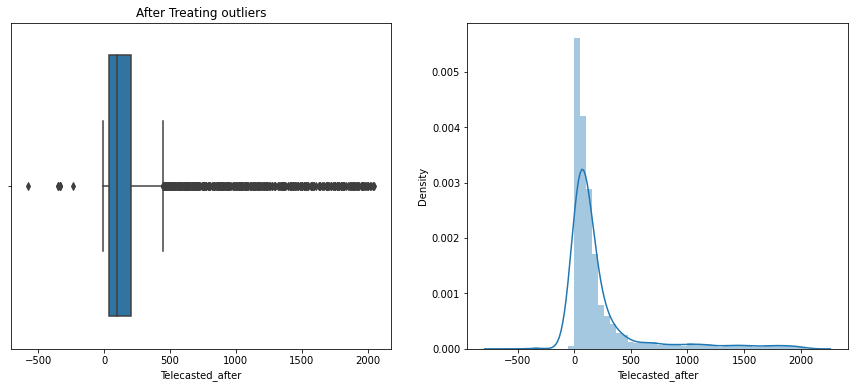

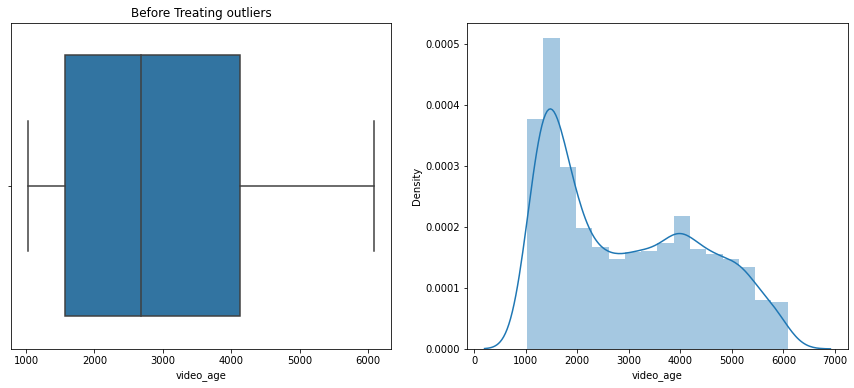

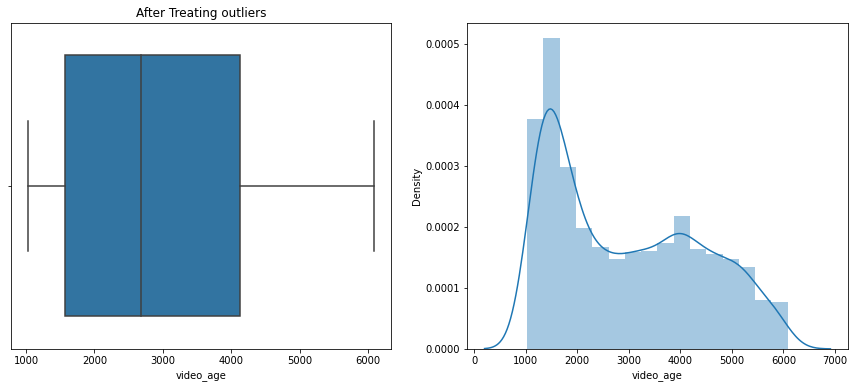

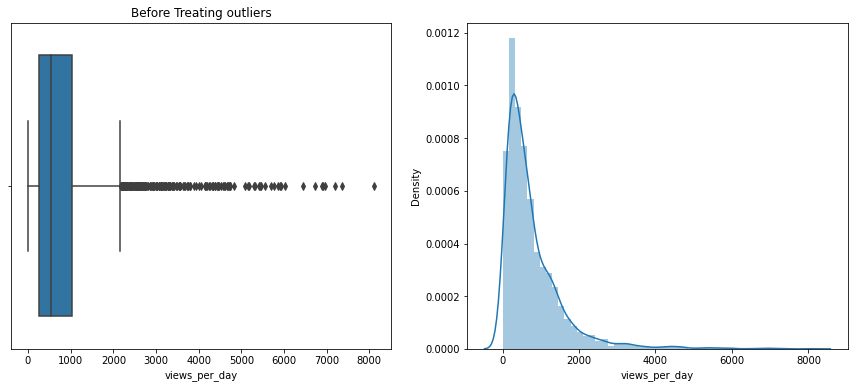

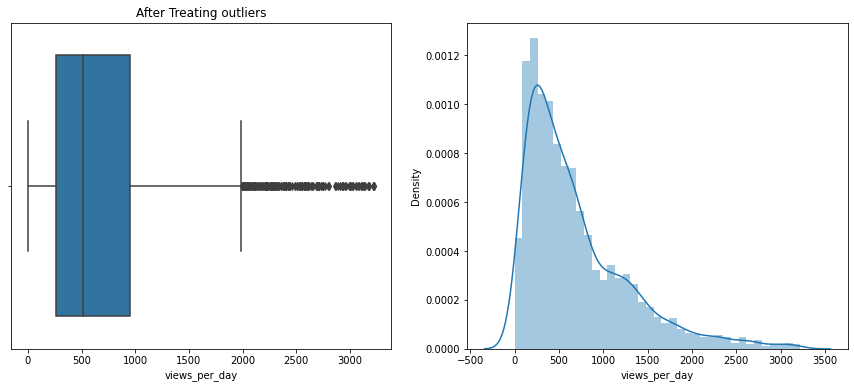

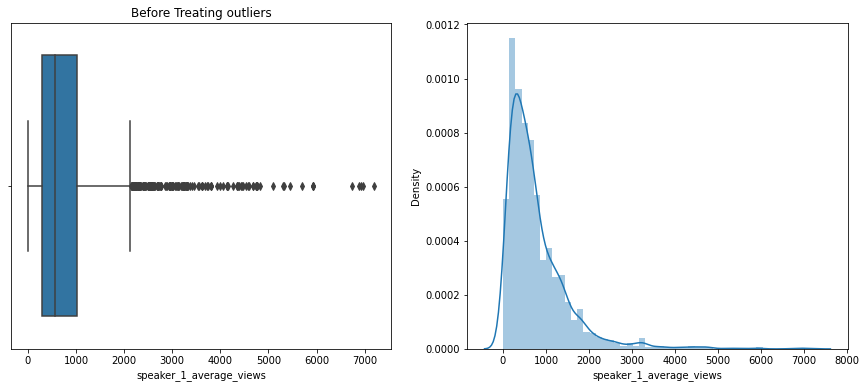

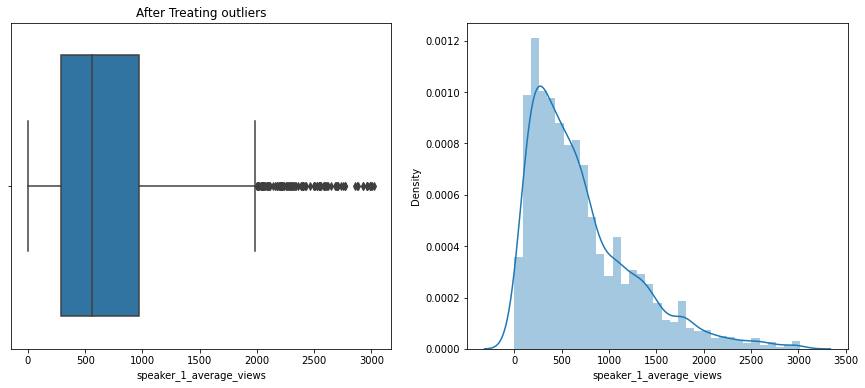

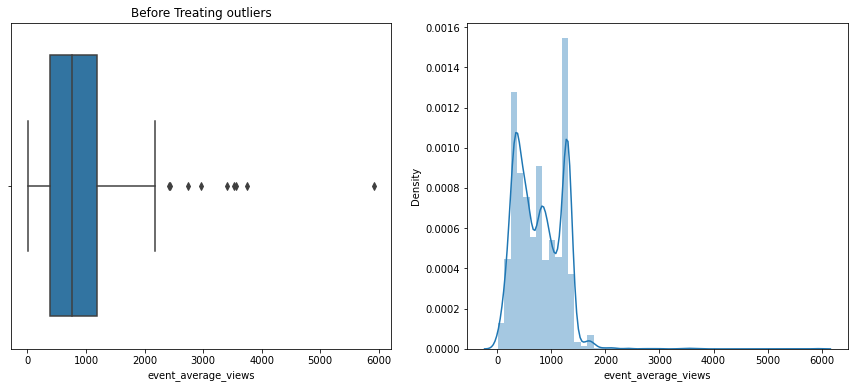

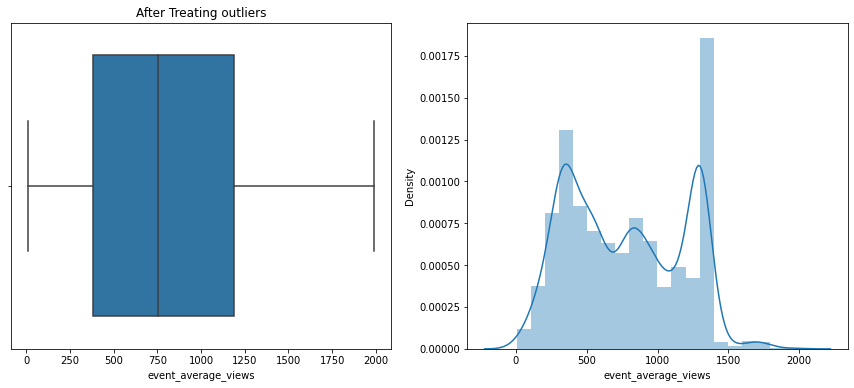

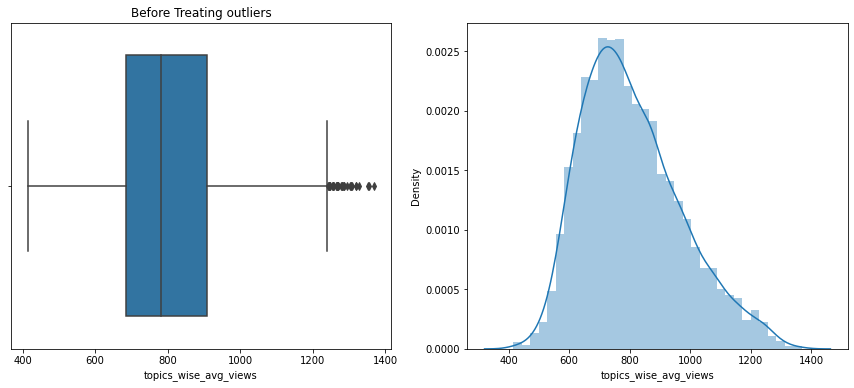

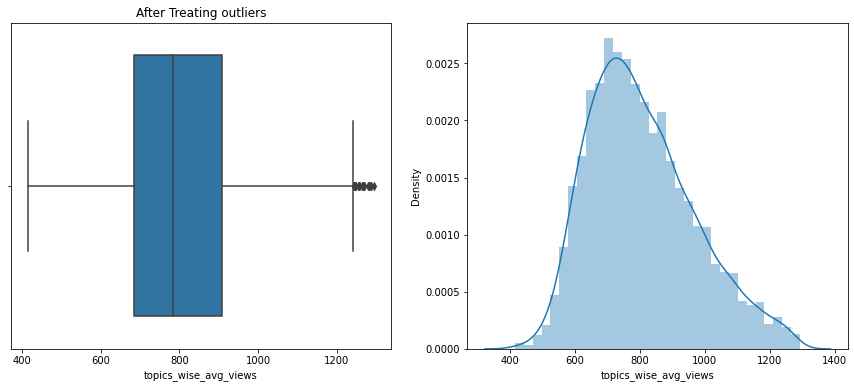

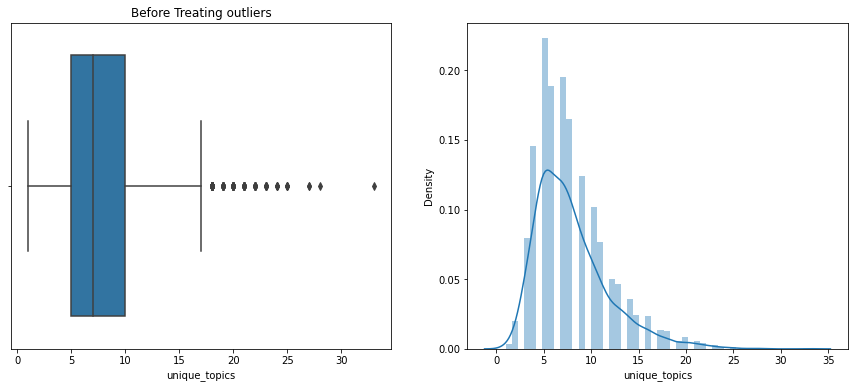

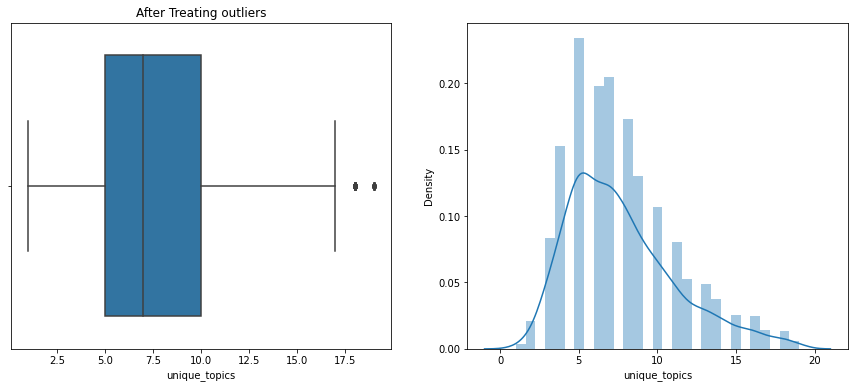

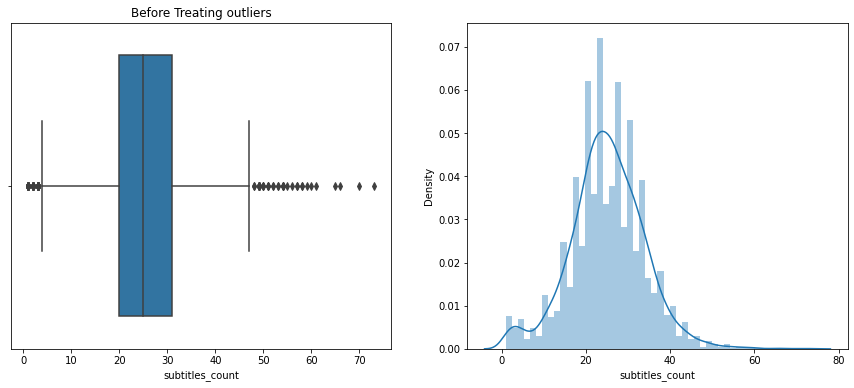

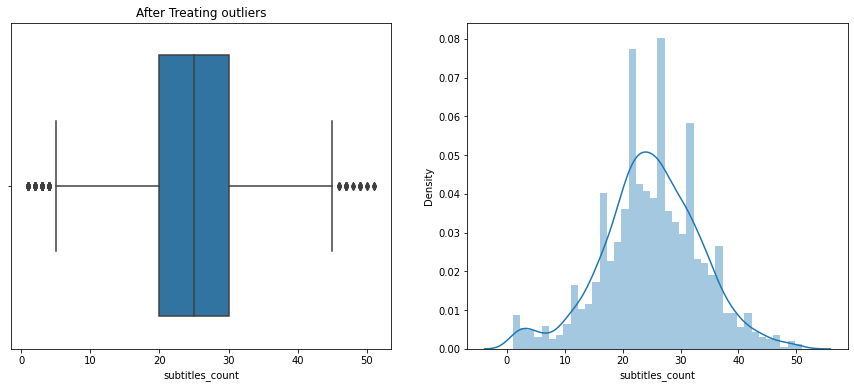

In [ ]:
for column in df.describe().columns:
  remove_outlier(df,column)

In [ ]:
df.drop('Telecasted_after',axis=1,inplace=True)
#It has alot of outliers...better not to consider it

In [ ]:
df_2 = df.copy()

#**Checking the conditions for LR**

Now that Feature engineering is done, we need to start with train test split and start building our models. But since we are trying to start with linear regression in here, we need to check several criterias for LR.

In [ ]:
# defining in X and Y
y = df['views_per_day']
X = df.drop(columns=['views_per_day'])

In [ ]:
X.head(2)

comments  duration release_day release_month  release_year  video_age  \
0     272.0     977.0     Tuesday          June          2006       6086   
1     124.0    1286.0     Tuesday          June          2006       6086   

   speaker_1_average_views  event_average_views  topics_wise_avg_views  \
0               497.089926           353.409495                  636.0   
1               510.344283           353.409495                  580.0   

   unique_topics  subtitles_count  
0              9               43  
1              9               26

In [ ]:
#to check multicollinearity, normal distribution, we need only numerical data, we dont want categorical variable
X_without_categorical_variable  = X[['comments', 'duration','video_age', 'speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

# to check linearity with the dependent variable.
df_without_categorical_variable =  df[['comments', 'duration','video_age','views_per_day','speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

**1) Checking linearity betweeen the dependent and independent variables**

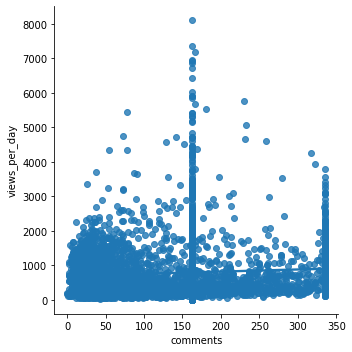

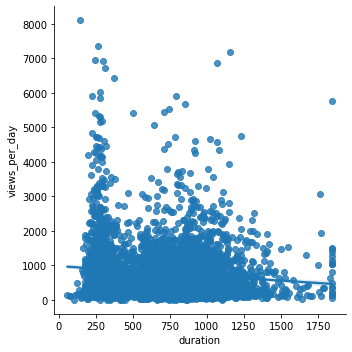

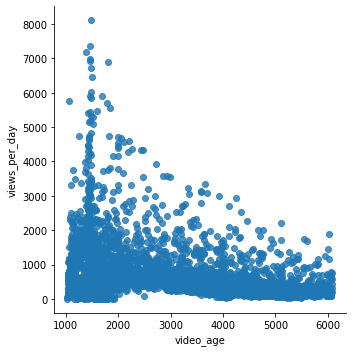

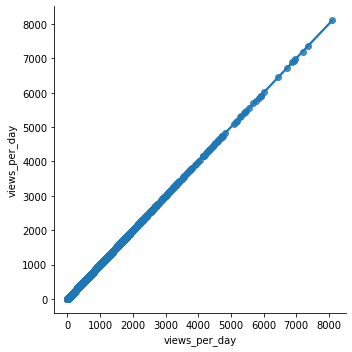

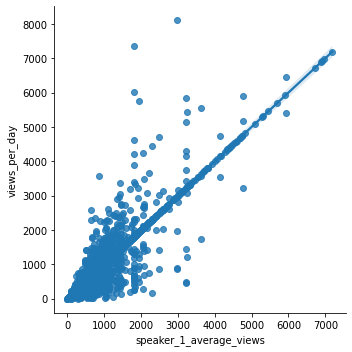

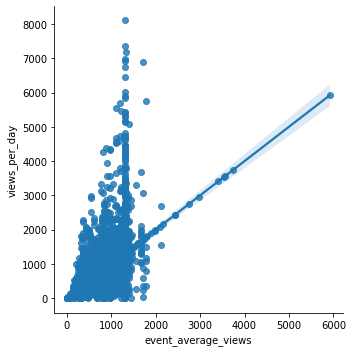

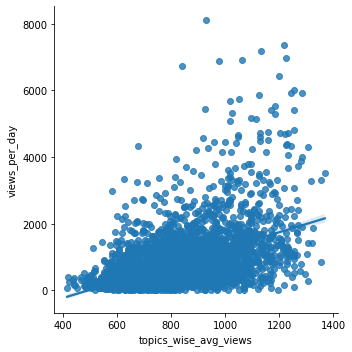

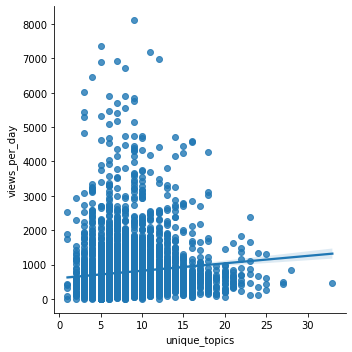

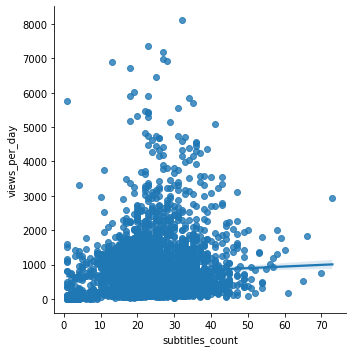

In [ ]:
for column in df_without_categorical_variable:
  sns.lmplot(x=column, y="views_per_day", data=df_without_categorical_variable, order=1)
# plt.ylabel('Target')
# plt.xlabel('Independent variable')

**2) Multi collinearity should be avoided**

In [ ]:
DF = X_without_categorical_variable.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF_df = calc_vif(X[[i for i in DF.describe().columns ]])
VIF_df

variables        VIF
0                 comments   3.823464
1                 duration   7.383345
2                video_age  16.363913
3  speaker_1_average_views   3.283093
4      event_average_views   9.882574
5    topics_wise_avg_views  21.510155
6            unique_topics   5.440203
7          subtitles_count  16.831111

In [ ]:
calc_vif(DF[[i for i in DF.describe().columns if i not in ['video_age','topics_wise_avg_views','subtitles_count'] ]])
#trying to leave which ever had >10

variables       VIF
0                 comments  2.493823
1                 duration  3.843513
2  speaker_1_average_views  2.965241
3      event_average_views  5.026635
4            unique_topics  4.703676

By VIF we have kept only few of the columns with less VIF score

**3)All independent variables shoould be normally distributed**

Here we checking from QQ plot 

#Applying Transformation

In [ ]:
#As we have more number of varibales,trying to create a function which does the plotting and transformation.
#But be carefull as we have several variables with positively skewed data and 'not-normal' data.
#Whenever we have positively skewed data we need to use the log transformation. Or else we can use Boxcox transformation.

#import libraries
import scipy.stats as stats
import pylab

def to_plot(column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()


def log_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()

def box_cox_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(column)

def square_root_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/2)
  print("After Transformation")
  to_plot(column)

def exponential_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/1.2)
  print("After Transformation")
  to_plot(column)


def power_transform(column):
  print("Applying Power Transformation.\n Before Transformation")
  to_plot(column)
  # applying power transformation
  DF[column]=np.power(DF[column],1/2)
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()


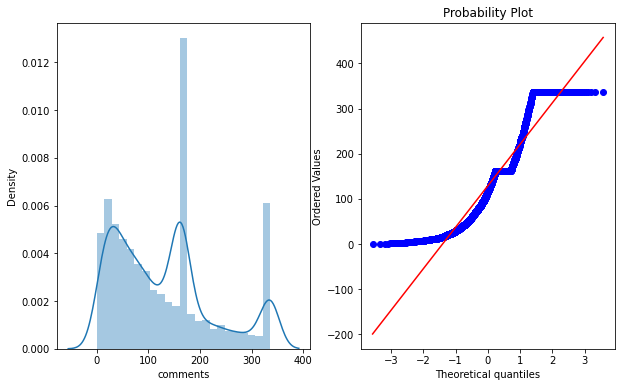

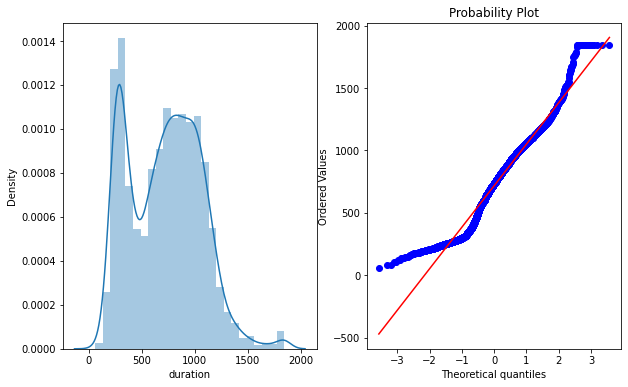

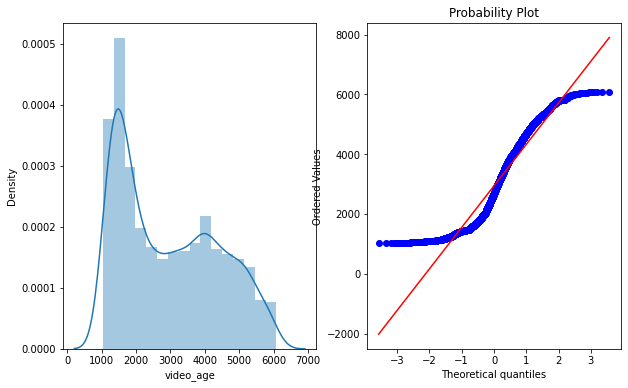

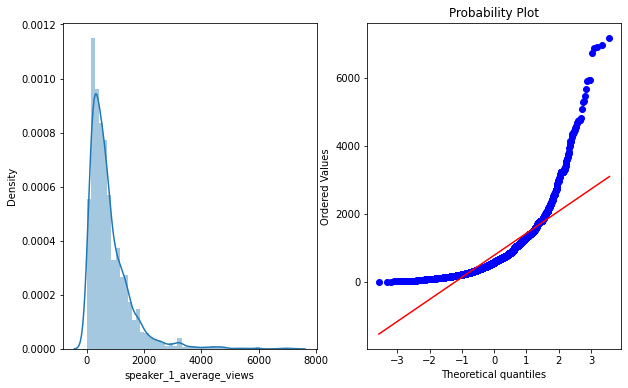

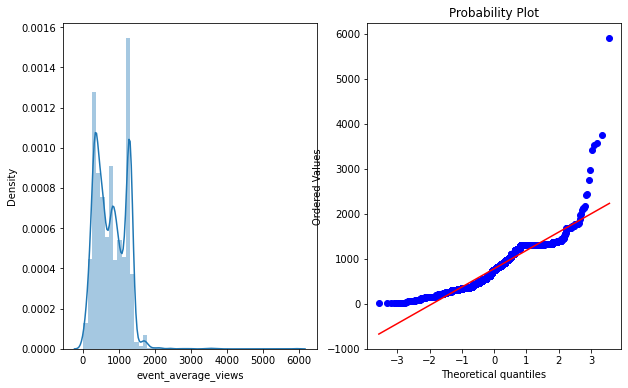

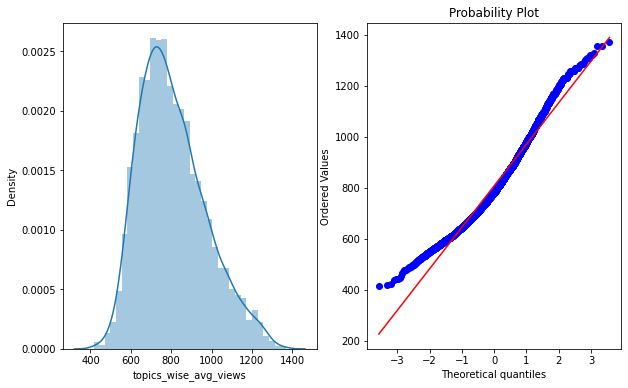

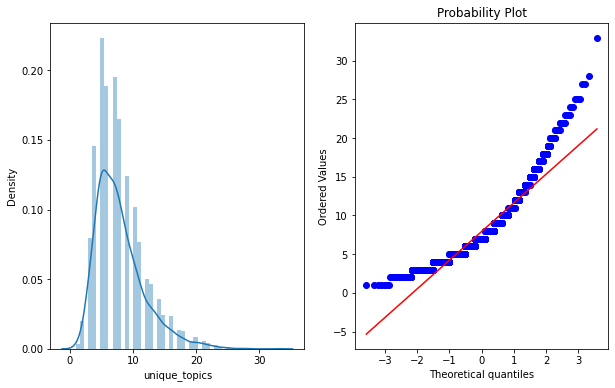

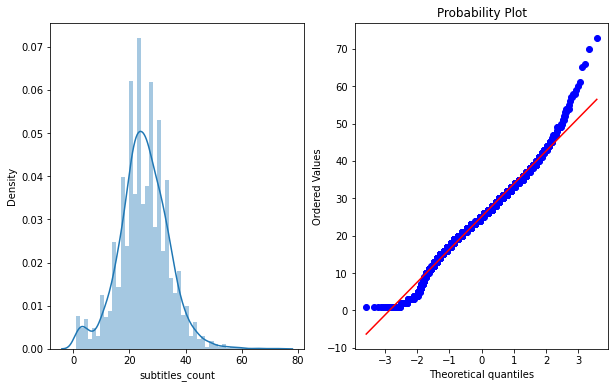

In [ ]:
for column in DF:
  to_plot(column)

Before Transformation


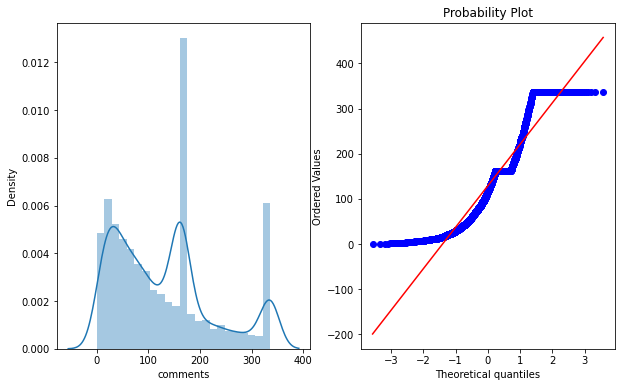

After Transformation


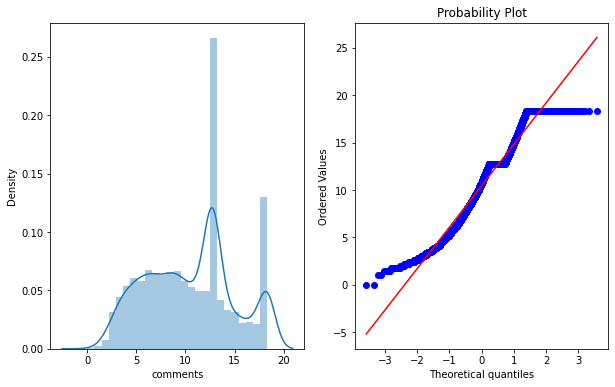

Before Transformation


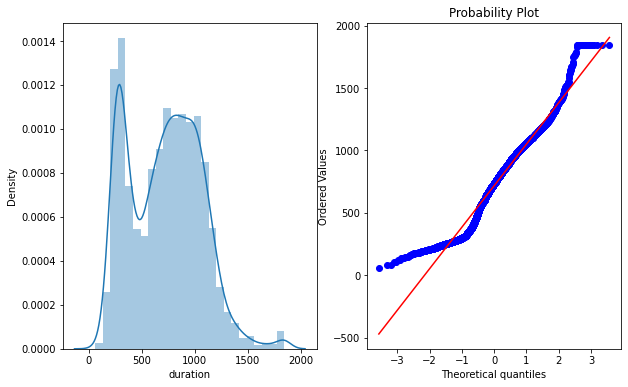

After Transformation


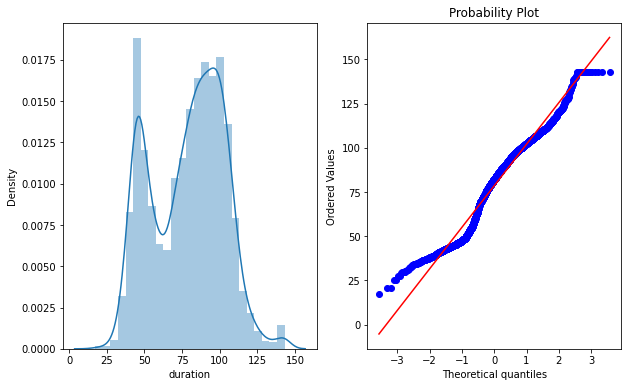

Before Transformation


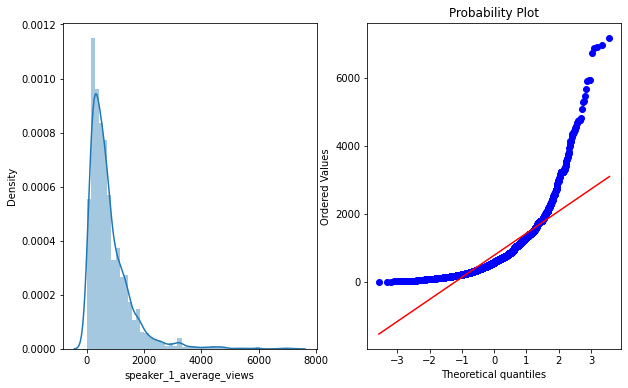

After Transformation


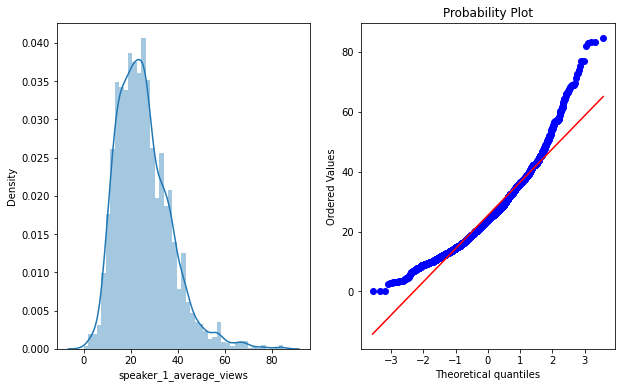

Before Transformation


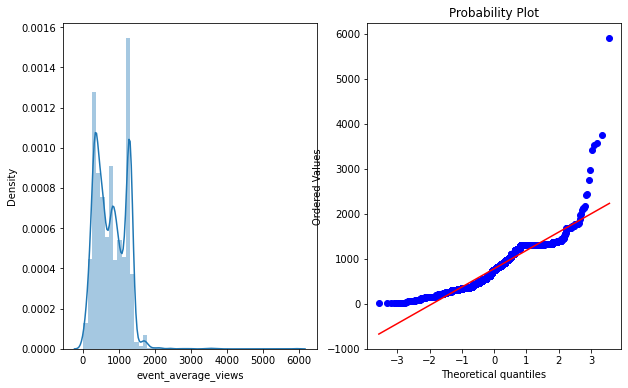

After Transformation


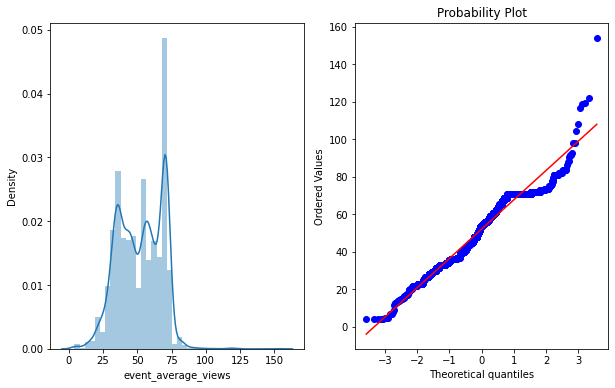

Before Transformation


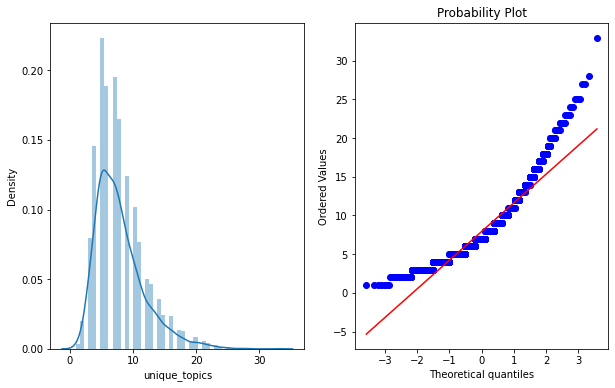

After Transformation


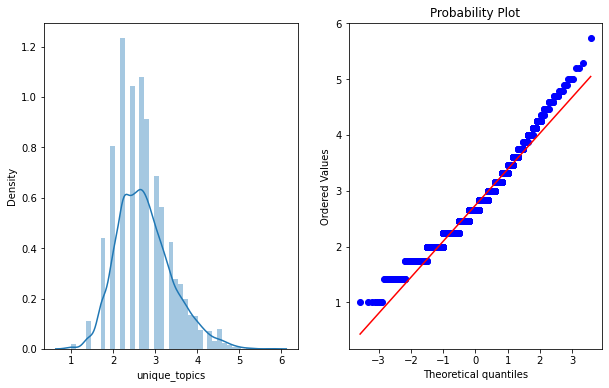

In [ ]:
square_root_transform('comments')
box_cox_transform('duration')

square_root_transform('speaker_1_average_views')
box_cox_transform('event_average_views')

square_root_transform('unique_topics')

After applying the transformation and treating with VIF factor checking again for correlation

In [ ]:
DF.head()
#Which does not contain categorical and dependent variable

comments    duration  video_age  speaker_1_average_views  \
0  16.492423   97.610498       6086                22.295514   
1  11.135529  115.142920       6086                22.590801   
2  14.798649  105.741599       6086                19.088634   
3   6.928203  110.344336       6073                13.938803   
4  18.330303   98.509736       6073                27.959377   

   event_average_views  topics_wise_avg_views  unique_topics  subtitles_count  
0            35.934366                  636.0       3.000000               43  
1            35.934366                  580.0       3.000000               26  
2            35.934366                  633.0       3.000000               35  
3            35.934366                  623.0       2.236068               19  
4            35.934366                  764.0       3.000000               31

In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
DF.drop('event_average_views',axis=1,inplace=True)
#Strong correlation 
DF.drop('topics_wise_avg_views',axis=1,inplace=True)
DF.drop('subtitles_count',axis=1,inplace=True)

In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

We saw that event wise average views a=were highly correlated wih speaker average views, so we tried dropping that out.

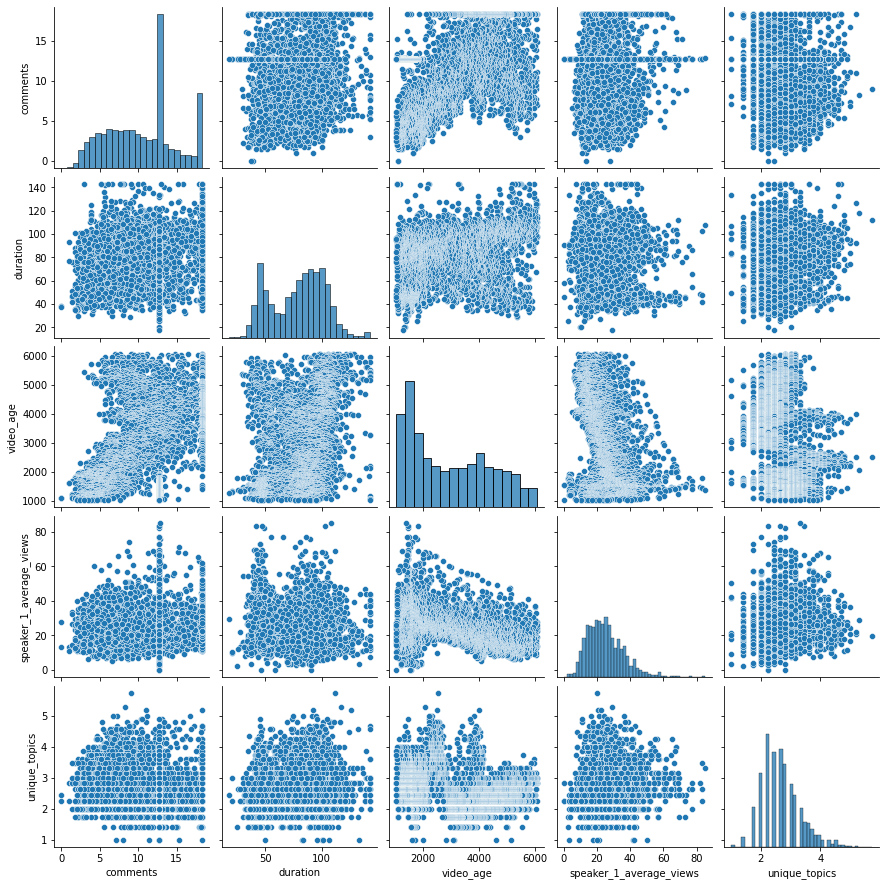

In [ ]:
p = sns.pairplot(DF)

Just trying to visualize the DF treating with correlation and transformation.

**One Hot Encoding**

DF contains only the numeric columns, so we merge it with the categorical column. And we use One hot encoding to use the categorical columns in a better way.

In [ ]:
DF.columns

Index(['comments', 'duration', 'video_age', 'speaker_1_average_views',
       'unique_topics'],
      dtype='object')

In [ ]:
features_df = DF.copy()

In [ ]:
features_df['release_day'] = df['release_day']
features_df['release_month'] = df['release_month']
features_df['release_year'] = df['release_year']

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       6086                22.295514            3.0   
1  11.135529  115.142920       6086                22.590801            3.0   

  release_day release_month  release_year  
0     Tuesday          June          2006  
1     Tuesday          June          2006

In [ ]:
features_df = pd.get_dummies(features_df, columns=['release_day', 'release_month', 'release_year'])

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       6086                22.295514            3.0   
1  11.135529  115.142920       6086                22.590801            3.0   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                   0                   0                     0   
1                   0                   0                     0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                   0                     0  ...                  0   
1                   0                     0  ...                  0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2020  
0                  0  
1                  0  

[2 rows x 39 columns]

**Min Max Scaler**

Now everythin is done except normalization, we need to have the dat in same standards to get optimized results for the models. So we use Min max scaler

In [ ]:
#Min max scaler


column_names = list(features_df.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features_df)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(features_df))
DF_scaled.columns = column_names

In [ ]:

DF_scaled.head()

comments  duration  video_age  speaker_1_average_views  unique_topics  \
0  0.899735  0.638816   1.000000                 0.262899       0.421535   
1  0.607493  0.778386   1.000000                 0.266381       0.421535   
2  0.807332  0.703545   1.000000                 0.225085       0.421535   
3  0.377964  0.740186   0.997429                 0.164360       0.260523   
4  1.000000  0.645974   0.997429                 0.329685       0.421535   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                 0.0                 0.0                   0.0   
1                 0.0                 0.0                   0.0   
2                 0.0                 0.0                   0.0   
3                 0.0                 1.0                   0.0   
4                 0.0                 1.0                   0.0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                 0.0                   0.0  ...                0.0   
1                 0.0                   0.0  ...                0.0   
2                 0.0                   0.0  ...                0.0   
3                 0.0                   0.0  ...                0.0   
4                 0.0                   0.0  ...                0.0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2020  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 39 columns]

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   video_age                3945 non-null   int64  
 3   speaker_1_average_views  3945 non-null   float64
 4   unique_topics            3945 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 154.2 KB


**Dependent Variable**

All the normalization and transformations were done only for the independent variables. Now we try doing the same for dependent variable as well to get better result for our model

In [ ]:
df['views_per_day'].describe()

count    3945.000000
mean      776.456738
std       820.823645
min         0.000000
25%       263.679273
50%       532.043312
75%      1022.963030
max      8105.612508
Name: views_per_day, dtype: float64

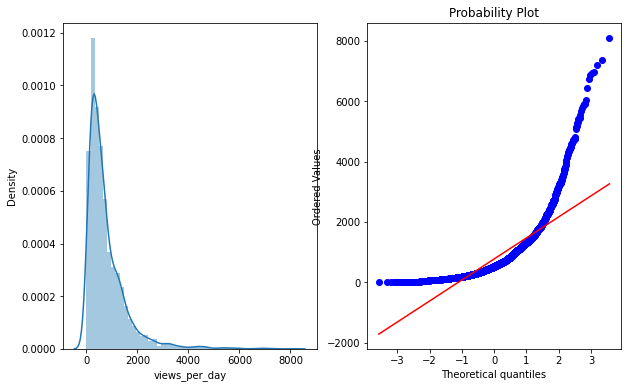

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['views_per_day'])
plt.subplot(1,2,2)
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
plt.show()

In [ ]:

def plot_(col):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(col)
  plt.subplot(1,2,2)
  stats.probplot(col,dist='norm',plot=pylab)
  plt.show()


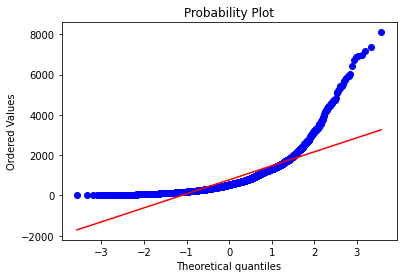

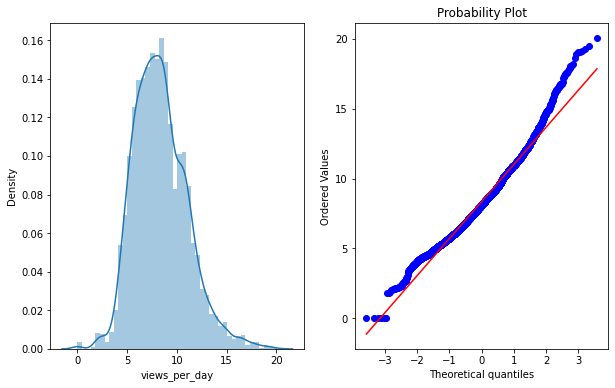

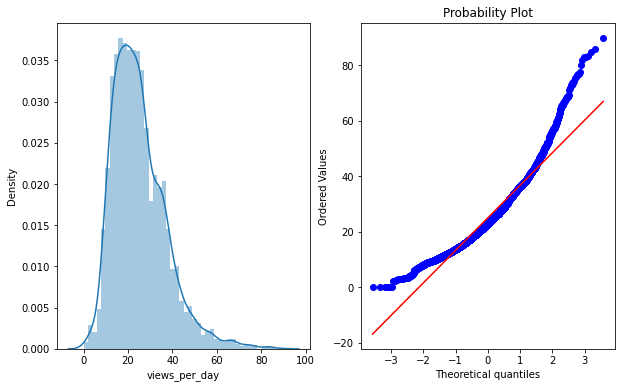

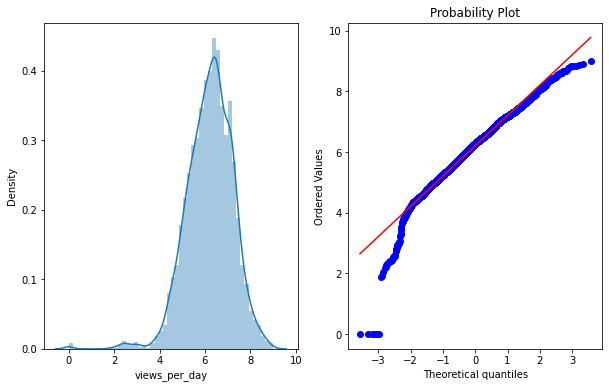

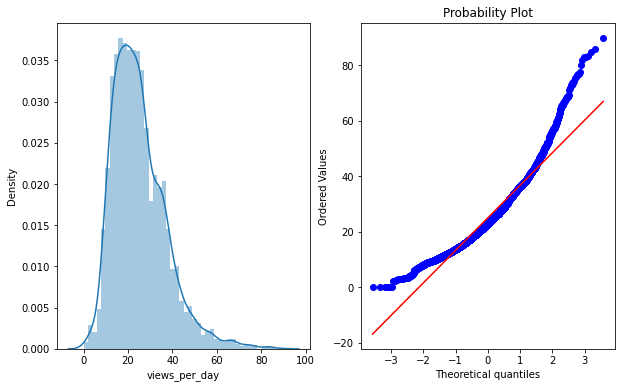

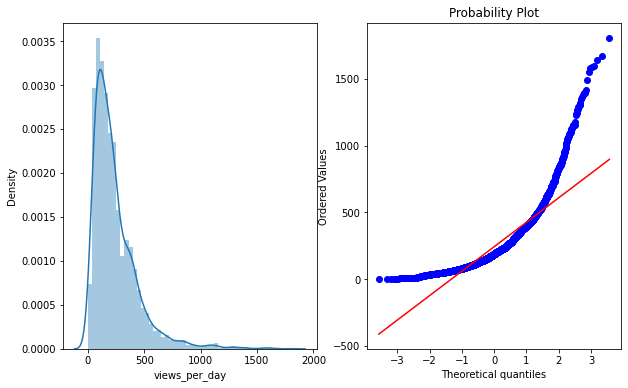

In [ ]:
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
y1 = np.power(df['views_per_day'],1/3)
plot_(y1)
y2=np.power(df['views_per_day'],1/2)
plot_(y2)
y3=np.log1p(df['views_per_day'])
plot_(y3)
#y4=stats.boxcox(df['views_per_day'])
y5=df['views_per_day']**(1/2)
plot_(y5)
y6=df['views_per_day']**(1/1.2)
plot_(y6)

In [ ]:
# df['views_per_day'] = np.power(df['views_per_day'],1/3)
# plot_(df['views_per_day'])

Now our Data is all set to build model .Before that lets just do the train and test split

#Train and Test Split

We have already taken the dependent variable seperately, lets just equate it into y and X has ll the indeoendent variables.

In [ ]:
df.head(2)
y = y1
X = DF_scaled

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.25, random_state= 0)


# Model Building 

In [ ]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


In [ ]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))


# Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,lin_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,lin_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8689
The r2 score for training is 0.8509


In [ ]:
y_pred_train_reg =lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_pred_train_reg,y_test,y_test_pred_reg)

MSE on test is 0.9756025413775212
MSE on train is 1.061800033979812
RMSE on test is 0.9877259444691737
RMSE on train is 1.0304368170731342
Training MAE: 0.56
Test MAE: 0.56


# Regularised linear regression

In [ ]:
!pip install catboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,StackingRegressor


In [ ]:
elastic_param = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                }

In [ ]:
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                       param_grid = elastic_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
elastic_grid.fit(X_train,y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=9,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_elastic = elastic_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_elastic.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_elastic.predict(X_train)),4)}")

The r2 score for testing is 0.8696
The r2 score for training is 0.8508


In [ ]:
y_pred_train_ela = optimal_elastic.predict(X_train)
y_test_pred_ela = optimal_elastic.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_pred_train_ela,y_test,y_test_pred_ela)

MSE on test is 0.9701389513280972
MSE on train is 1.0626698150929157
RMSE on test is 0.9849563195025947
RMSE on train is 1.030858775532767
Training MAE: 0.55
Test MAE: 0.56


# Random Forest

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,rf.predict(X_train)),4)}")

The r2 score for testing is 0.8424
The r2 score for training is 0.9724


In [ ]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_rf,y_test,y_test_pred_rf)

MSE on test is 1.1723486366847307
MSE on train is 0.19666938957652808
RMSE on test is 1.0827504960445553
RMSE on train is 0.44347422650761575
Training MAE: 0.22
Test MAE: 0.57


# Optimal Random Forest

In [ ]:
rf_param = {
            'n_estimators':[100,250,500],
            'max_depth':[2,4,5,6],
            'max_leaf_nodes':[150]
           }

In [ ]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = rf_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=9,
             param_grid={'max_depth': [2, 4, 5, 6], 'max_leaf_nodes': [150],
                         'n_estimators': [100, 250, 500]},
             scoring='r2', verbose=2)

In [ ]:
optimal_rf = rf_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_rf.predict(X_train)),4)}")

The r2 score for testing is 0.8675
The r2 score for training is 0.8765


In [ ]:
y_train_pred_optimal_rf = optimal_rf.predict(X_train)
y_test_pred_optimal_rf = optimal_rf.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optimal_rf,y_test,y_test_pred_optimal_rf)

MSE on test is 0.985890993223399
MSE on train is 0.8797291547127284
RMSE on test is 0.9929204365020387
RMSE on train is 0.9379387798319933
Training MAE: 0.44
Test MAE: 0.48


# CatBoost Regression

In [ ]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)

Learning rate set to 0.048596
0:	learn: 2.5784011	total: 49.5ms	remaining: 49.4s
1:	learn: 2.4897972	total: 60.5ms	remaining: 30.2s
2:	learn: 2.4060343	total: 66.1ms	remaining: 22s
3:	learn: 2.3261400	total: 78.1ms	remaining: 19.5s
4:	learn: 2.2486076	total: 81.3ms	remaining: 16.2s
5:	learn: 2.1784635	total: 86.8ms	remaining: 14.4s
6:	learn: 2.1096424	total: 94.8ms	remaining: 13.4s
7:	learn: 2.0437713	total: 107ms	remaining: 13.2s
8:	learn: 1.9816022	total: 113ms	remaining: 12.4s
9:	learn: 1.9221382	total: 121ms	remaining: 12s
10:	learn: 1.8647356	total: 129ms	remaining: 11.6s
11:	learn: 1.8119069	total: 134ms	remaining: 11.1s
12:	learn: 1.7633068	total: 140ms	remaining: 10.6s
13:	learn: 1.7130435	total: 145ms	remaining: 10.2s
14:	learn: 1.6709793	total: 148ms	remaining: 9.75s
15:	learn: 1.6279317	total: 154ms	remaining: 9.45s
16:	learn: 1.5902777	total: 159ms	remaining: 9.19s
17:	learn: 1.5520914	total: 174ms	remaining: 9.47s
18:	learn: 1.5139197	total: 186ms	remaining: 9.6s
19:	learn

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,cat_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,cat_reg.predict(X_train)),4)}")

The r2 score for testing is 0.877
The r2 score for training is 0.9614


In [ ]:
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_cat,y_test,y_test_pred_cat)

MSE on test is 0.9151902928877292
MSE on train is 0.27489606953040974
RMSE on test is 0.9566557860002359
RMSE on train is 0.5243053209060631
Training MAE: 0.32
Test MAE: 0.55


# Optimal catboost regression

In [ ]:
cat_param = {'depth': [2,4,5],
             'learning_rate' : [0.01,0.05,0.1],
             'iterations'    : [150,200]
            }

In [ ]:
ct_grid = GridSearchCV(estimator=cat_reg,
                       param_grid = cat_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
ct_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 2.4844831	total: 1.14ms	remaining: 228ms
1:	learn: 2.3151432	total: 2.44ms	remaining: 242ms
2:	learn: 2.1685121	total: 3.72ms	remaining: 245ms
3:	learn: 2.0296518	total: 5.12ms	remaining: 251ms
4:	learn: 1.9030757	total: 6.5ms	remaining: 253ms
5:	learn: 1.7932333	total: 7.71ms	remaining: 249ms
6:	learn: 1.7024914	total: 8.92ms	remaining: 246ms
7:	learn: 1.6189652	total: 10.1ms	remaining: 243ms
8:	learn: 1.5455494	total: 11.3ms	remaining: 240ms
9:	learn: 1.4829342	total: 12.5ms	remaining: 238ms
10:	learn: 1.4202358	total: 13.7ms	remaining: 236ms
11:	learn: 1.3692989	total: 14.9ms	remaining: 233ms
12:	learn: 1.3219669	total: 15.8ms	remaining: 227ms
13:	learn: 1.2872925	total: 16.7ms	remaining: 222ms
14:	learn: 1.2527289	total: 17.5ms	remaining: 216ms
15:	learn: 1.2205931	total: 18.5ms	remaining: 212ms
16:	learn: 1.1990821	total: 19.3ms	remaining: 208ms
17:	learn: 1.1762143	total: 20.2ms	remaining: 204ms
18:	learn: 1.1

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f6079250910>,
             n_jobs=9,
             param_grid={'depth': [2, 4, 5], 'iterations': [150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_cat = ct_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_cat.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_cat.predict(X_train)),4)}")

The r2 score for testing is 0.879
The r2 score for training is 0.9015


In [ ]:
y_train_pred_optcat = optimal_cat.predict(X_train)
y_test_pred_optcat = optimal_cat.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optcat,y_test,y_test_pred_optcat)

MSE on test is 0.9002466673935845
MSE on train is 0.7016725244483442
RMSE on test is 0.9488132942753198
RMSE on train is 0.8376589547353649
Training MAE: 0.45
Test MAE: 0.53


# XG Boost Regression

In [ ]:
xgb_reg = XGBRegressor()

In [ ]:
xgb_reg.fit(X_train,y_train)

[01:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8747
The r2 score for training is 0.892


In [ ]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MSE on test is 0.9324852613060668
MSE on train is 0.769048937297203
RMSE on test is 0.9656527643548
RMSE on train is 0.8769543530293941
Training MAE: 0.45
Test MAE: 0.52


# Optimised XGboost 

In [ ]:
xgb_param = {'n_estimators': [50,100,150,200],
            'max_depth': [2,4,5,10],
            'learning_rate':[0.01,0.05,0.1]
            }

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_reg,
                       param_grid = xgb_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[01:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=9,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [ ]:
optimal_xgb = xgb_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_xgb.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_xgb.predict(X_train)),4)}")

The r2 score for testing is 0.8715
The r2 score for training is 0.9148


In [ ]:
y_train_pred_optxgb = optimal_xgb.predict(X_train)
y_test_pred_optxgb = optimal_xgb.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optxgb,y_test,y_test_pred_optxgb)

MSE on test is 0.9559153263372591
MSE on train is 0.6066142078737726
RMSE on test is 0.977709223817214
RMSE on train is 0.7788544202055816
Training MAE: 0.40
Test MAE: 0.52


# LGBM

In [ ]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train,y_train)

LGBMRegressor()

In [ ]:
r2_score(y_train,lgbm_reg.predict(X_train))

0.946562372858974

In [ ]:
r2_score(y_test,lgbm_reg.predict(X_test))

0.8753811469650161

In [ ]:
y_train_pred_lgbm = lgbm_reg.predict(X_train)
y_test_pred_lgbm = lgbm_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm,y_test,y_test_pred_lgbm)

MSE on test is 0.9271015834680657
MSE on train is 0.38057131188673504
RMSE on test is 0.9628611444377978
RMSE on train is 0.6169046213854578
Training MAE: 0.35
Test MAE: 0.54


# Optimal LGBM

In [ ]:
lgbm_param = {
              "n_estimators" :[50,100,150],
              'num_leaves': [6,8,12,16],
              "max_depth": [2,4,5],
              "learning_rate": [0.01,0.05,0.1]
              }

In [ ]:
lgbm_grid = GridSearchCV(estimator=lgbm_reg,
                       param_grid = lgbm_param,n_jobs=6,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='r2', verbose=2)

In [ ]:
lgbm_optimal = lgbm_grid.best_estimator_

In [ ]:
r2_score(y_test,lgbm_optimal.predict(X_test))

0.8777948052085962

In [ ]:
r2_score(y_train,lgbm_optimal.predict(X_train))

0.9084887284697474

In [ ]:
y_train_pred_lgbm_optimal = lgbm_optimal.predict(X_train)
y_test_pred_lgbm_optimal = lgbm_optimal.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm_optimal,y_test,y_test_pred_lgbm_optimal)

MSE on test is 0.9091451802026174
MSE on train is 0.6517236359837144
RMSE on test is 0.9534910488319318
RMSE on train is 0.8072940207778789
Training MAE: 0.43
Test MAE: 0.52


# Extra Tree Regression

In [ ]:
extra_tree_reg = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
extra_tree_reg.fit(X_train, y_train)

ExtraTreesRegressor(criterion='mae', max_depth=30, min_samples_leaf=2,
                    min_samples_split=6, n_estimators=200)

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,extra_tree_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,extra_tree_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8761
The r2 score for training is 0.9409


In [ ]:
y_train_pred_extra = extra_tree_reg.predict(X_train)
y_test_pred_extra = extra_tree_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_extra,y_test,y_test_pred_cat)

MSE on test is 0.9151902928877292
MSE on train is 0.4209837890633676
RMSE on test is 0.9566557860002359
RMSE on train is 0.6488326356336953
Training MAE: 0.25
Test MAE: 0.55


# Optimal Extra Tree Regression

In [ ]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_train_pred_etopt = et_optimal_model.predict(X_train)
y_test_pred_etopt = et_optimal_model.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_etopt,y_test,y_test_pred_etopt)

In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

**Comparing all models with model performance**

In [ ]:
regressors = [optimal_elastic,optimal_rf,optimal_cat,xgb_reg,lgbm_optimal,et_optimal_model]
reg_names = ['Regularized Linear regression','RandomForest','CatBoost','XGBoost','LGBM','Extra tree regressor']
training,testing = [],[]
for i in regressors:
    tr = round(r2_score(y_train,i.predict(X_train)),3)
    ts = round(r2_score(y_test,i.predict(X_test)),3)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(regressors)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(regressors)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(regressors)), reg_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing r2-scores for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can observe that our modt models are overfitting, they performed alot better in traing but their performance is poor in testing. But comparitvely Regularized linear regression is performing well in traing and testing.

**Evaluation metric for all models (in comaprision)**

In [ ]:
#Defining all the models
models = [
           ['Regularized Linear Regression', elastic_grid.best_estimator_],
           ['Optimal Random Forest ', rf_grid.best_estimator_],
           ['LGBM ', lgbm_grid.best_estimator_],
           ['Catboost ',  ct_grid.best_estimator_],
           ['XGBoost ',xgb_reg],    
           ['Extra tree regressor ', et_random.best_estimator_]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_1_data = []
for name,model in models :
    model_data = {}
    model.random_state = 42
    model_data["Name"] = name
    model.fit(X_train,y_train)
    model_data["MAE_train"] = round(metrics.mean_absolute_error(y_train, model.predict(X_train)),4)
    model_data["MAE_test"] = round(metrics.mean_absolute_error(y_test, model.predict(X_test)),4)
    model_data["MSE_train"] = round(metrics.mean_squared_error(y_train, model.predict(X_train)),4)
    model_data["MSE_test"] = round(metrics.mean_squared_error(y_test, model.predict(X_test)),4)
    model_data["R2_Score_train"] = round(r2_score(y_train,model.predict(X_train)),4)
    model_data["R2_Score_test"] = round(r2_score(y_test,model.predict(X_test)),4)
    model_data['Adjusted_R2_score_train'] = 1 - (1-(r2_score(y_train,model.predict(X_train))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data['Adjusted_R2_score_test'] = 1 - (1-(r2_score(y_test,model.predict(X_test))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data["RMSE_Score_train"] = round(np.sqrt(mean_squared_error(y_train,model.predict(X_train))),4)
    model_data["RMSE_Score_test"] = round(np.sqrt(mean_squared_error(y_test,model.predict(X_test))),4)
    model_1_data.append(model_data)

In [ ]:
results = pd.DataFrame(model_1_data)
results

# Conclusion ;
After comparing all the models we can conclude that Optimal Random Forest and aswell as Extra Tree is the best performer.